# Exploratory Data Analysis

In [1]:
pwd

'c:\\Users\\wware\\Desktop\\UWA Bootcamp\\Challenges\\project_1\\Statistics'

## Data Preparation and Dependencies Setup

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import os
from scipy.stats import stats

# Study data files
seasonal_pollution_path = os.path.join("..","Resources", "Data", "seasonal_combined_df1_ww.csv")
monthly_pollution_path = os.path.join("..","Resources", "Data", "monthly_combined_df1_ww.csv")

# Read the data and the results

seasonal_pollution_df = pd.read_csv(seasonal_pollution_path)
monthly_pollution_df = pd.read_csv(monthly_pollution_path)

# Create output directory
stats_output_dir_season = 'Stats_Outputs/Season'
if not os.path.exists(stats_output_dir_season):
    os.makedirs(stats_output_dir_season)

stats_output_dir_month = 'Stats_Outputs/Month'
if not os.path.exists(stats_output_dir_month):
    os.makedirs(stats_output_dir_month)


## Seasonal EDA

In [30]:
seasonal_pollution_df.head()


,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,pm10,nh3,name,latitude,longitude,country,population,is_capital,is_rural,country_full
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,1.410569,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,1.397143,0.000014,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,0.630580,0.000134,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,0.755046,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,1.421771,0.000983,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat


In [31]:
dtypes = seasonal_pollution_df.dtypes
dtypes

city             object
Hemisphere       object
Season           object
Year              int64
Season_Year      object
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
name             object
latitude        float64
longitude       float64
country          object
population      float64
is_capital         bool
is_rural           bool
country_full     object
dtype: object

In [32]:
seasonal_pollution_df.describe()

,Year,co,no,no2,o3,so2,pm2_5,pm10,nh3,latitude,longitude,population
count,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3.583000e+03
mean,2022.801496,280.663335,0.553074,3.996631,50.799707,2.290710,10.914334,23.683782,1.625098,18.546498,11.149274,1.635218e+05
std,0.748330,162.313280,1.773417,6.708260,21.975908,6.806494,20.658813,55.929085,4.038999,33.077678,90.903671,5.936431e+05
min,2022.000000,136.984537,0.000000,0.005763,-1.666304,0.012097,0.500000,-6.560791,0.000000,-54.807200,-178.158000,1.000000e+01
25%,2022.000000,209.020861,0.022329,0.505223,34.793403,0.240355,1.938362,2.495681,0.071611,-8.000000,-71.735300,1.147000e+04
50%,2023.000000,234.757592,0.072113,1.324841,49.938478,0.608842,4.147857,6.664513,0.343797,22.912500,16.518900,2.508500e+04
75%,2023.000000,277.270230,0.255401,4.159782,66.840304,1.658761,9.333122,15.911112,1.320414,46.194400,88.116600,1.088600e+05
max,2024.000000,1800.546890,27.973810,55.992440,162.001292,98.496577,244.718690,633.222727,57.549971,71.626900,177.517000,7.674439e+06


In [33]:
# Check for missing values
print(seasonal_pollution_df.isnull().sum())

city              0
Hemisphere        0
Season            0
Year              0
Season_Year       0
co                0
no                0
no2               0
o3                0
so2               0
pm2_5             0
pm10              0
nh3               0
name              0
latitude          0
longitude         0
country          20
population      160
is_capital        0
is_rural          0
country_full      0
dtype: int64


In [34]:
# Checking the number of mice.
number_of_cities=seasonal_pollution_df['city'].nunique()
number_of_cities

373

In [35]:
# Create a new column by combining 'city' and 'Season_Year' with an underscore
seasonal_pollution_df['city_season'] = seasonal_pollution_df['city'] + '_' + seasonal_pollution_df['Season_Year']

# Check the first few rows to ensure the new column is correct
print(seasonal_pollution_df[['city_season']].head())



           city_season
0  Aasiaat_Summer_2022
1  Aasiaat_Autumn_2022
2  Aasiaat_Winter_2022
3  Aasiaat_Spring_2022
4  Aasiaat_Summer_2023


In [36]:
entry_count = len(seasonal_pollution_df['city_season'])
entry_count

3743

In [37]:
# Get the duplicate city
duplicates=seasonal_pollution_df[seasonal_pollution_df.duplicated(subset=["city", "Season_Year"], keep=False)]
duplicates['city'].unique()

array(['Ciudad Lazaro Cardenas', 'Las Palmas'], dtype=object)

In [38]:
duplicated_rows=seasonal_pollution_df[seasonal_pollution_df.duplicated(subset=['city', 'Season_Year'], keep=False)]

print('Duplicated entries: ', len(duplicated_rows))
print(duplicated_rows.head())


Duplicated entries:  40
                       city           Hemisphere  Season  Year  Season_Year  \
680  Ciudad Lazaro Cardenas  Northern Hemisphere  Summer  2022  Summer_2022   
681  Ciudad Lazaro Cardenas  Northern Hemisphere  Summer  2022  Summer_2022   
682  Ciudad Lazaro Cardenas  Northern Hemisphere  Autumn  2022  Autumn_2022   
683  Ciudad Lazaro Cardenas  Northern Hemisphere  Autumn  2022  Autumn_2022   
684  Ciudad Lazaro Cardenas  Northern Hemisphere  Winter  2022  Winter_2022   

             co        no        no2         o3        so2  ...       nh3  \
680  537.329685  1.598352  10.707319  35.977694  17.737759  ...  0.215560   
681  537.329685  1.598352  10.707319  35.977694  17.737759  ...  0.215560   
682  546.952225  1.675875  11.705678  37.859734  19.092701  ...  0.287976   
683  546.952225  1.675875  11.705678  37.859734  19.092701  ...  0.287976   
684  514.248884  0.852381  13.757188  54.377932  18.822187  ...  0.328869   

                       name  latitude 

In [39]:
# Dropping duplicates, keeping the first entry
seasonal_pollution_clean_df = seasonal_pollution_df.drop_duplicates(subset=['city', 'Season_Year'], keep='first')
seasonal_pollution_clean_df.head()

,city,Hemisphere,Season,Year,Season_Year,co,no,no2,o3,so2,...,nh3,name,latitude,longitude,country,population,is_capital,is_rural,country_full,city_season
0,Aasiaat,Northern Hemisphere,Summer,2022,Summer_2022,179.718204,0.022079,0.313528,52.637019,0.220574,...,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Summer_2022
1,Aasiaat,Northern Hemisphere,Autumn,2022,Autumn_2022,187.498562,0.001525,0.180261,70.555879,0.093420,...,0.000014,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Autumn_2022
2,Aasiaat,Northern Hemisphere,Winter,2022,Winter_2022,210.086533,0.000000,0.104167,87.908289,0.120997,...,0.000134,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Winter_2022
3,Aasiaat,Northern Hemisphere,Spring,2022,Spring_2022,227.892261,0.018850,0.165229,77.791464,0.286301,...,0.000000,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Spring_2022
4,Aasiaat,Northern Hemisphere,Summer,2023,Summer_2023,221.827736,0.021082,0.337785,48.390688,0.218066,...,0.000983,Aasiaat,68.7097,-52.8694,GL,3134.0,False,True,Kalaallit Nunaat,Aasiaat_Summer_2023


In [40]:
# Checking the number of mice.
number_of_cities_no_dups=seasonal_pollution_clean_df['city'].nunique()
number_of_cities_no_dups

373

In [41]:
entry_count = len(seasonal_pollution_clean_df['city_season'])
entry_count

3723

# Correlation

In [42]:
# List of columns to plot
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Create a histogram for each column
for pollutant in pollutants:
    plt.figure()
    seasonal_pollution_df[pollutant].plot(kind='hist', bins=20)
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of global {pollutant}')
    plt.savefig(f'{stats_output_dir_season}/{pollutant}_histogram_global.png')
    plt.close()


In [43]:
seasons = seasonal_pollution_clean_df['Season'].unique()


In [44]:
# Optional: Define a color map for different seasons for visual clarity
colors = ['blue', 'green', 'red', 'purple']  # One color for each season
season_color = {season: color for season, color in zip(seasons, colors)}

for pollutant in pollutants:
    plt.figure(figsize=(10, 6))  # Create a figure for each pollutant

    for season in seasons:
        season_data = seasonal_pollution_df[seasonal_pollution_df['Season'] == season][pollutant].dropna()
        plt.hist(season_data, bins=20, histtype='step', linewidth=1.5, label=season, color=season_color[season])

    plt.title(f'Global Histogram of {pollutant.capitalize()} by Season')
    plt.xlabel(f'{pollutant.capitalize()} Concentration')
    plt.ylabel('Frequency')
    plt.legend(title='Season')
    plt.grid(True)  # Optional: Turn on grid for better readability

    # Save the plot in the output directory
    plt.savefig(f'{stats_output_dir_season}/{pollutant}_global_histogram_by_season.png')
    plt.close()  # Close the plot to free up memory

In [45]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for pollutant in pollutants:
    seasonal_pollution_clean_df[pollutant] = pd.to_numeric(seasonal_pollution_clean_df[pollutant], errors='coerce')

mean_pollution = seasonal_pollution_clean_df.groupby(['Season'])[pollutants].mean()
max_pollution = seasonal_pollution_clean_df.groupby(['Season'])[pollutants].max()
min_pollution = seasonal_pollution_clean_df.groupby(['Season'])[pollutants].min()
std_pollution = seasonal_pollution_clean_df.groupby(['Season'])[pollutants].std()

# Concatenate the statistics DataFrames along columns
stats_by_season = pd.concat([
    mean_pollution.add_suffix('_Mean'),
    max_pollution.add_suffix('_Max'),
    min_pollution.add_suffix('_Min'),
    std_pollution.add_suffix('_Std')
], axis=1)

# Transpose the DataFrame
transposed_stats_by_season = stats_by_season.T

# Sort the DataFrame by the index directly if 'Season' is the index
sorted_transposed_stats_by_season = transposed_stats_by_season.sort_index(ascending=True)

# Print the sorted DataFrame
print(sorted_transposed_stats_by_season)

Season           Autumn       Spring       Summer       Winter
co_Max      1772.905386  1584.519647  1188.859524  1800.546890
co_Mean      278.781852   276.025633   245.072885   315.990026
co_Min       138.984889   165.574386   136.984537   172.297032
co_Std       165.874353   130.497130   116.196638   208.158210
nh3_Max       26.433581    57.549971    16.232056    35.038651
nh3_Mean       1.280894     2.177450     0.978113     1.952975
nh3_Min        0.000000     0.000000     0.000000     0.000000
nh3_Std        3.056192     5.376312     2.029203     4.432253
no2_Max       43.326181    44.558658    34.676793    55.992440
no2_Mean       3.899885     3.583766     2.372448     5.840046
no2_Min        0.007333     0.007569     0.005763     0.007536
no2_Std        6.429576     5.663821     4.155236     8.911006
no_Max        13.639890    11.231832    16.145472    27.973810
no_Mean        0.562781     0.404419     0.299881     0.910550
no_Min         0.000000     0.000014     0.000000     0

C:\Users\wware\AppData\Local\Temp\ipykernel_20800\2952914727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasonal_pollution_clean_df[pollutant] = pd.to_numeric(seasonal_pollution_clean_df[pollutant], errors='coerce')


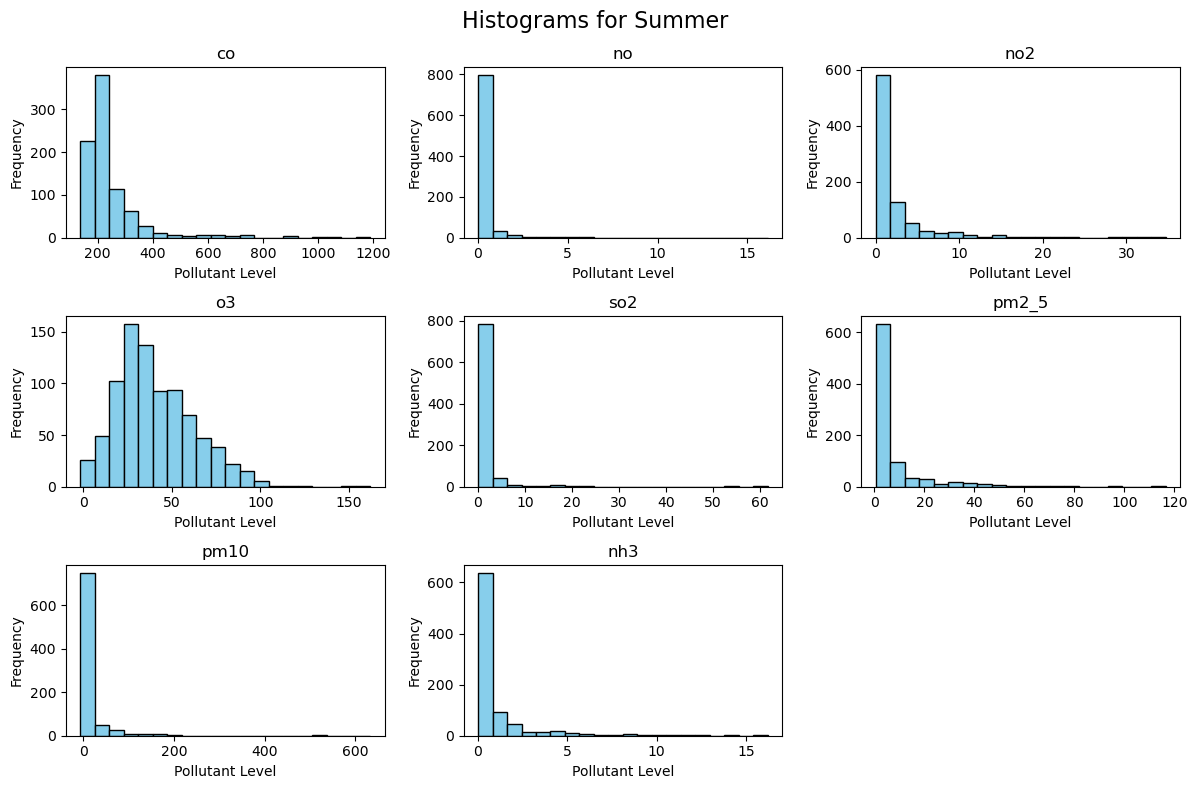

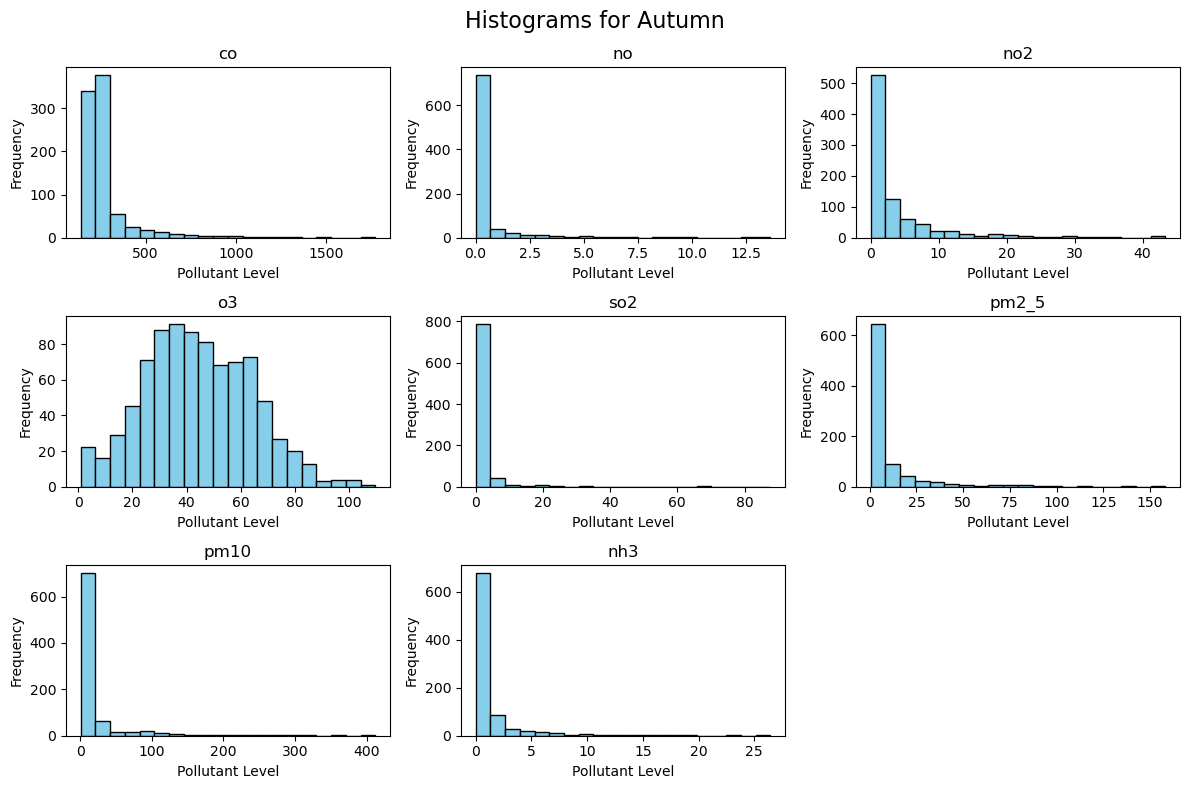

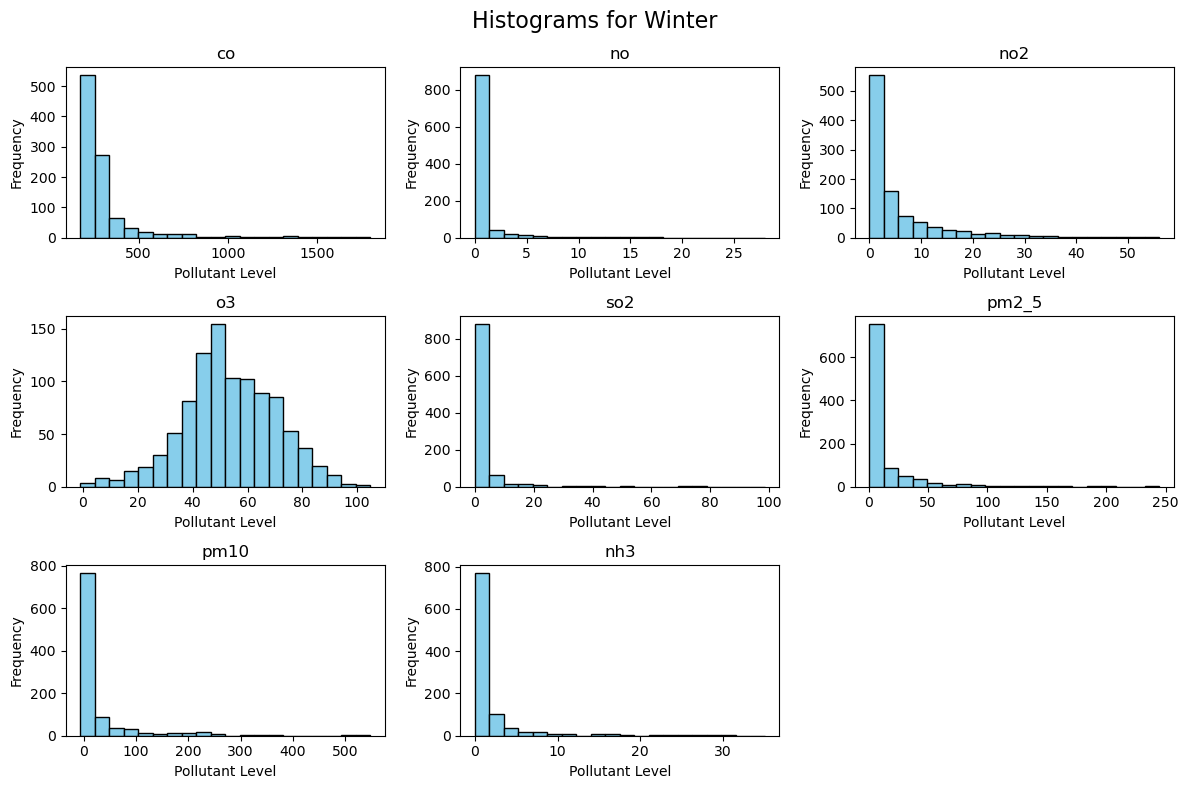

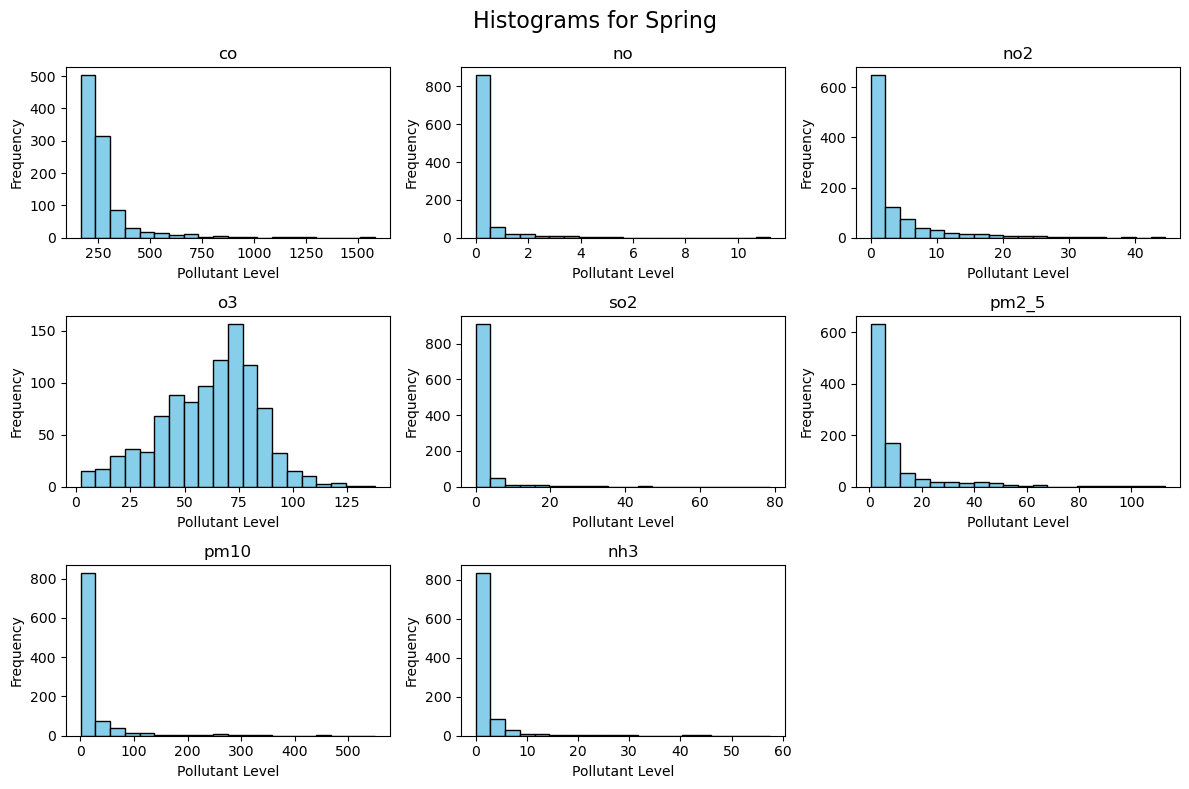

In [46]:
# Iterate over each season
for season in seasons:
    # Filter data for the current season
    season_data = seasonal_pollution_clean_df[seasonal_pollution_clean_df['Season'] == season]
    
    # Create a new figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        plt.hist(season_data[pollutant].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Pollutant Level')  # Set x-axis label
        plt.ylabel('Frequency')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Histograms for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

In [57]:
# IQR plots (all)

# Output file path
txt_file_path = os.path.join(stats_output_dir_season, 'IQR.txt')

# Open the output file and write to it
with open(txt_file_path, 'w') as txt_file:
    # Loop over each season
    for season in seasonal_pollution_clean_df['Season'].unique():
        txt_file.write(f"Season: {season}\n")
        # Filter data for the current season
        season_data = seasonal_pollution_clean_df[seasonal_pollution_clean_df['Season'] == season]

        # Calculate the IQR for each pollutant for the current season
        for pollutant in pollutants:
            if pollutant in season_data.columns:  # Check if the column exists
                clean_data = season_data[pollutant].dropna()
                quartiles = clean_data.quantile([.25, .75])
                first_quartile = quartiles[0.25]
                third_quartile = quartiles[0.75]
                iqr = third_quartile - first_quartile

                # Calculate lower and upper bounds to identify outliers
                lower_bound = first_quartile - 1.5 * iqr
                upper_bound = third_quartile + 1.5 * iqr
                outliers = clean_data[(clean_data < lower_bound) | (clean_data > upper_bound)]

                txt_file.write(f"{pollutant.capitalize()} IQR: {iqr:.2f}\n")
                txt_file.write(f"Values below {lower_bound:.2f} or above {upper_bound:.2f} could be outliers.\n")

                # Identify and report potential outliers
                if not outliers.empty:
                    txt_file.write(f"Potential outliers: {outliers.values}\n")
                else:
                    txt_file.write("No potential outliers detected.\n")
                txt_file.write("================================================================================\n")

        txt_file.write("\n")  # Add a newline for separation between seasons
    



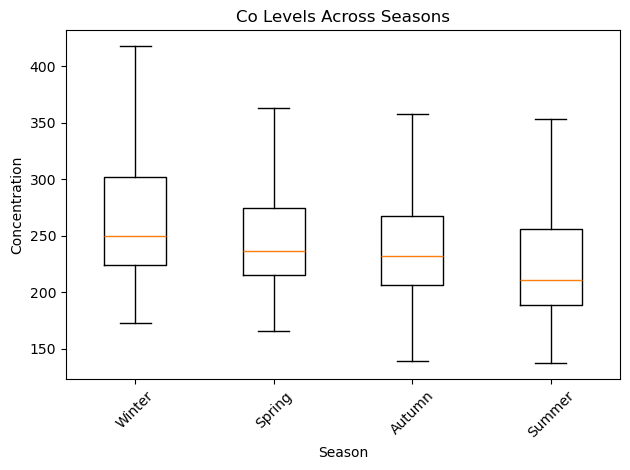

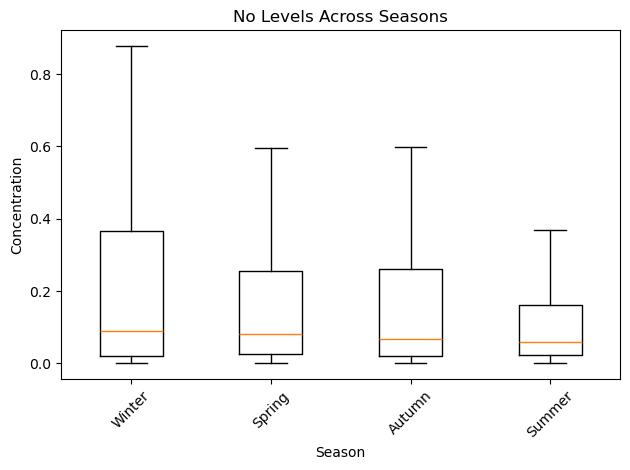

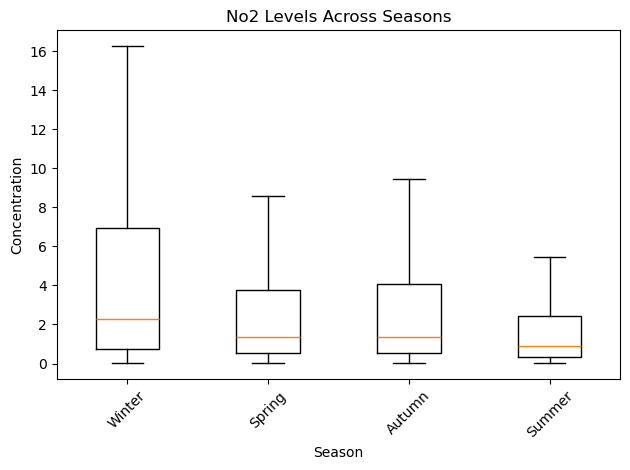

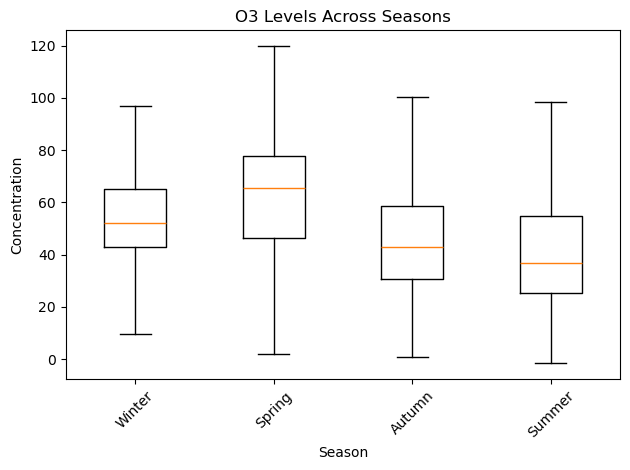

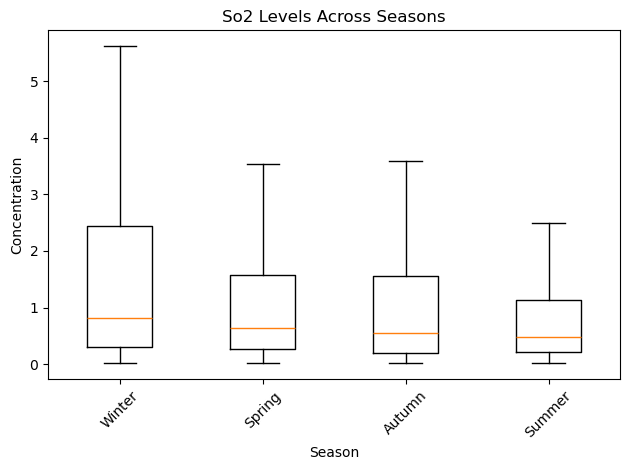

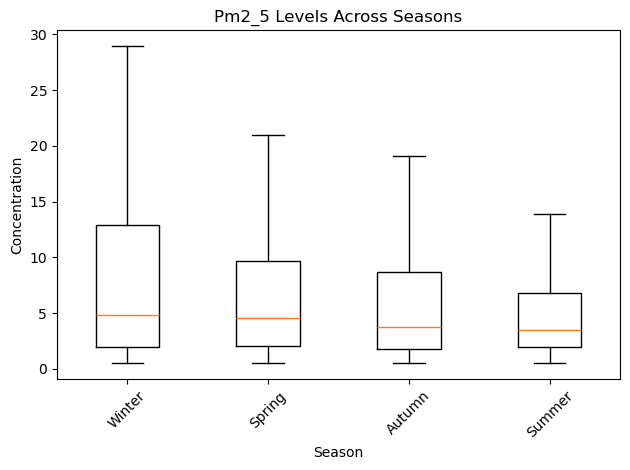

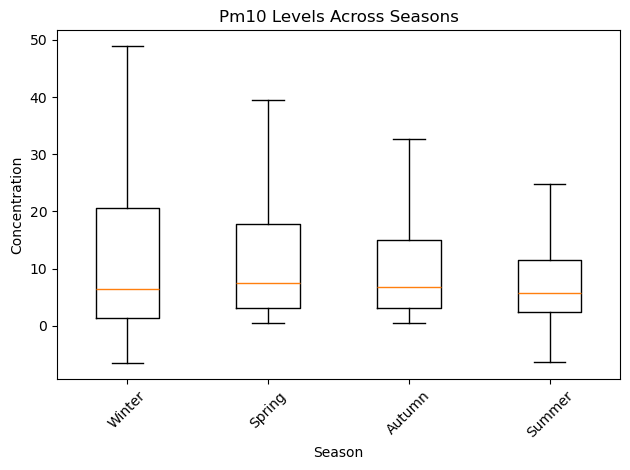

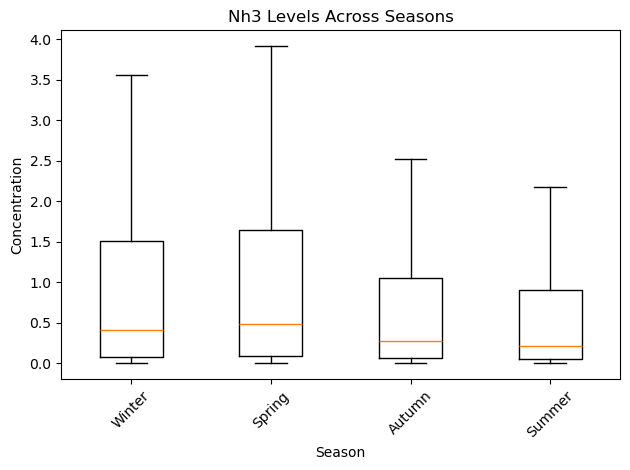

In [72]:
# Box plots (with outliers)
# Assuming 'seasonal_pollution_df', 'seasons', and 'pollutants' are predefined
# Make sure the output directory exists
os.makedirs(stats_output_dir_season, exist_ok=True)

# Prepare data for plotting
pollutant_data_by_season = {
    pollutant: [
        seasonal_pollution_df[
            (seasonal_pollution_df['Season'] == season) & 
            (seasonal_pollution_df[pollutant].notna())
        ][pollutant] for season in seasons
    ] for pollutant in pollutants
}

# Create box plots for each pollutant
for pollutant, data in pollutant_data_by_season.items():
    fig, ax = plt.subplots()
    ax.boxplot(data, labels=seasons, showfliers=False)
    ax.set_title(f'{pollutant.capitalize()} Levels Across Seasons')
    ax.set_ylabel('Concentration')
    ax.set_xlabel('Season')

    # Setting x-axis tick labels with rotation and applying tight layout
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Define output file name for each pollutant plot and save it
    png_file_name = f'{pollutant}_box_plots.png'
    png_file_path = os.path.join(stats_output_dir_season, png_file_name)

    # Save the plot to the specified path
    fig.savefig(png_file_path)
    
    # Optionally display the plot
    plt.show()

In [68]:
import pandas as pd

# Assuming seasonal_pollution_clean_df is your DataFrame

# Define pollutants and seasons
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
seasons = ['Winter', 'Spring', 'Autumn', 'Summer']

# Function to remove outliers using IQR method
def remove_outliers(df):
    df_cleaned = pd.DataFrame()
    for pollutant in pollutants:
        for season in seasons:
            # Select subset for each pollutant and season
            subset = df[df['Season'] == season][pollutant]
            # Calculate IQR
            Q1 = subset.quantile(0.25)
            Q3 = subset.quantile(0.75)
            IQR = Q3 - Q1
            # Filter outliers
            subset_cleaned = df[(df['Season'] == season) & ((df[pollutant] >= (Q1 - 1.5 * IQR)) & (df[pollutant] <= (Q3 + 1.5 * IQR)))]
            # Append to cleaned DataFrame
            df_cleaned = pd.concat([df_cleaned, subset_cleaned])
    return df_cleaned

# Remove outliers from seasonal_pollution_clean_df
seasonal_cleaned_combined = remove_outliers(seasonal_pollution_clean_df)

# Output the combined cleaned DataFrame
print(seasonal_cleaned_combined)


                    city           Hemisphere  Season  Year  Season_Year  \
2                Aasiaat  Northern Hemisphere  Winter  2022  Winter_2022   
6                Aasiaat  Northern Hemisphere  Winter  2023  Winter_2023   
8                Aasiaat  Northern Hemisphere  Winter  2024  Winter_2024   
26    Acapulco De Juarez  Northern Hemisphere  Winter  2023  Winter_2023   
28    Acapulco De Juarez  Northern Hemisphere  Winter  2024  Winter_2024   
...                  ...                  ...     ...   ...          ...   
3717         Yellowknife  Northern Hemisphere  Summer  2023  Summer_2023   
3723              Zaraza  Northern Hemisphere  Summer  2022  Summer_2022   
3727              Zaraza  Northern Hemisphere  Summer  2023  Summer_2023   
3733               `Ataq  Northern Hemisphere  Summer  2022  Summer_2022   
3737               `Ataq  Northern Hemisphere  Summer  2023  Summer_2023   

              co        no        no2         o3       so2  ...       nh3  \
2     210.

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

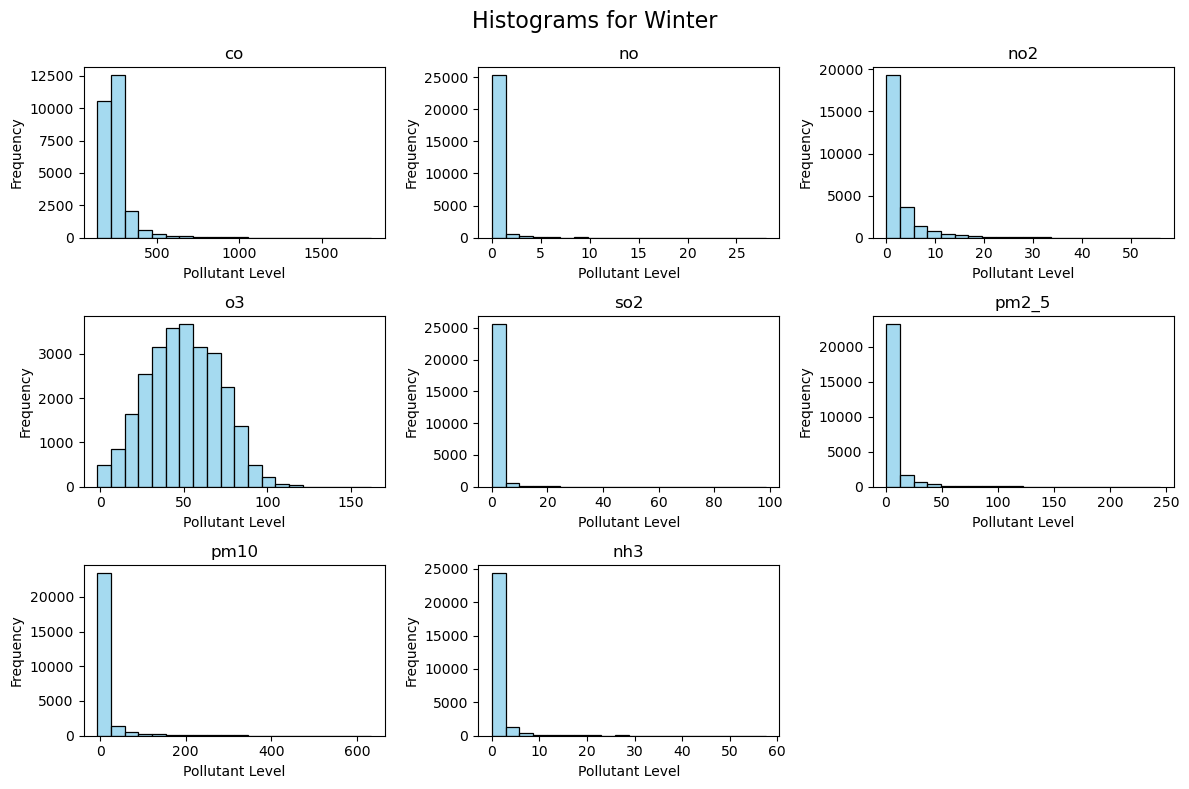

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

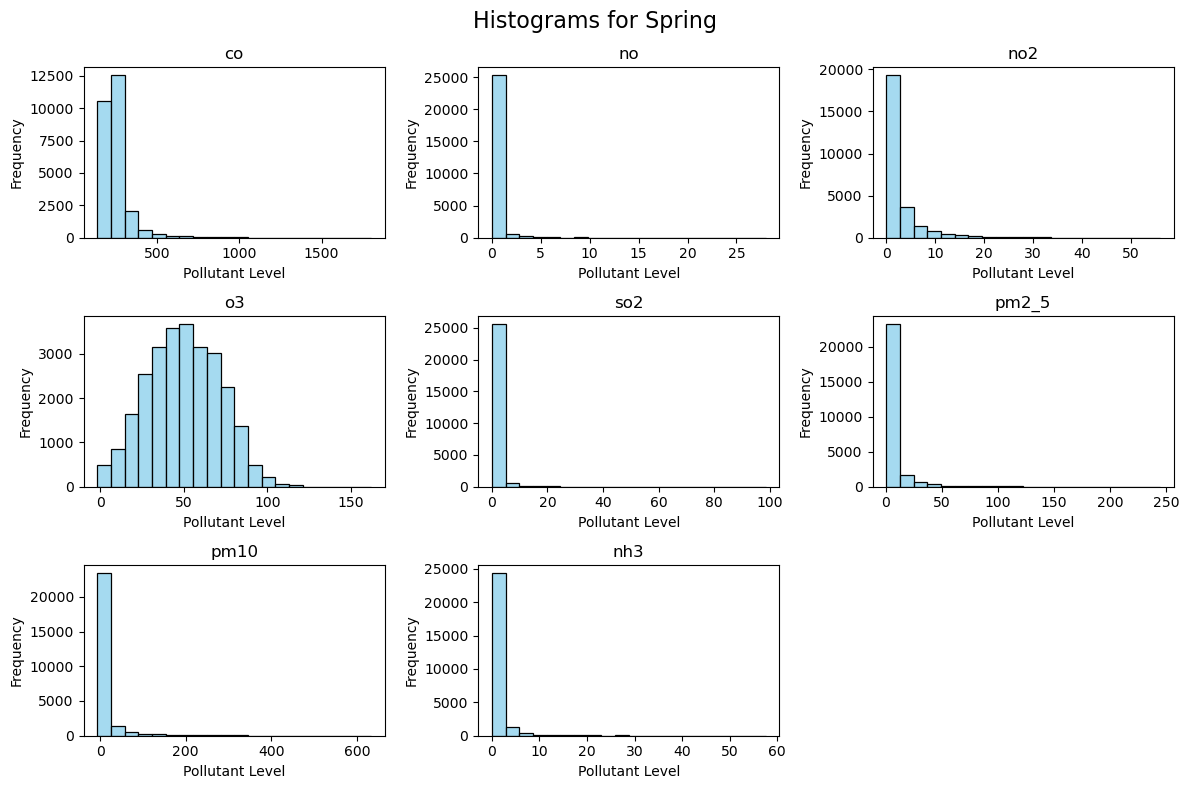

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

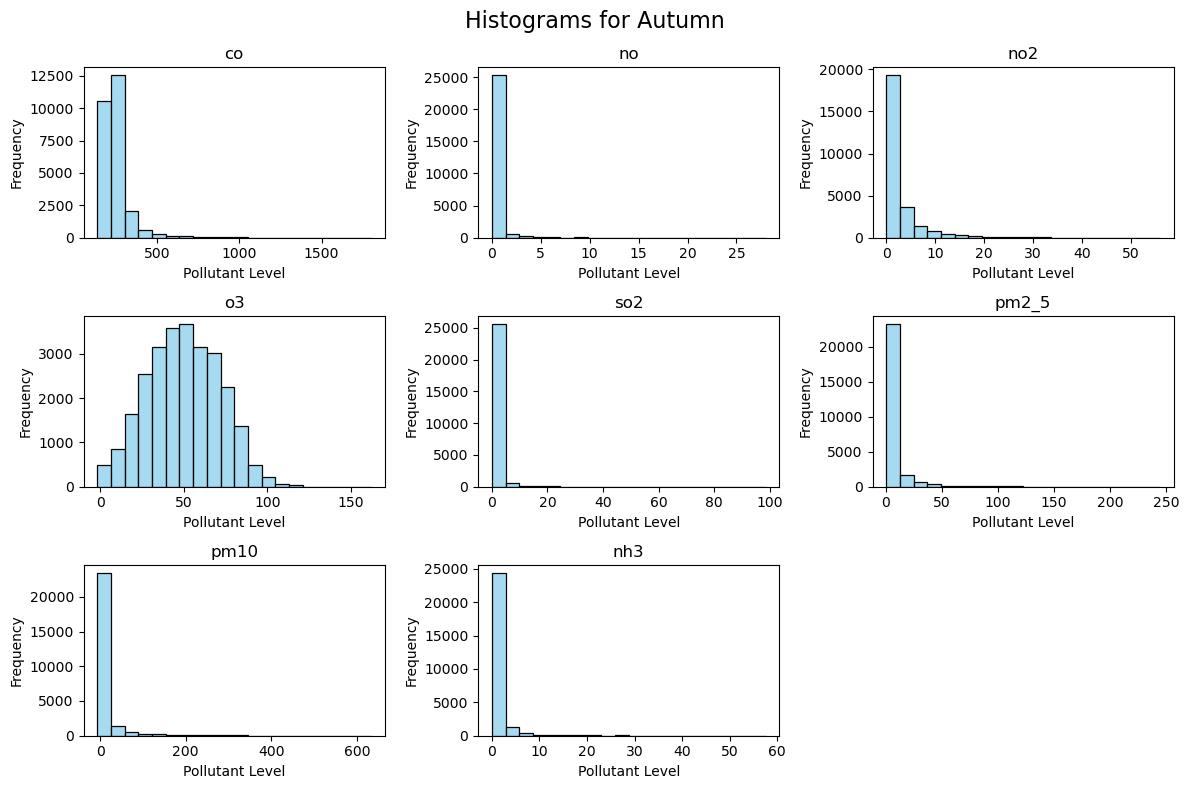

c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\wware\AppData\Local\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

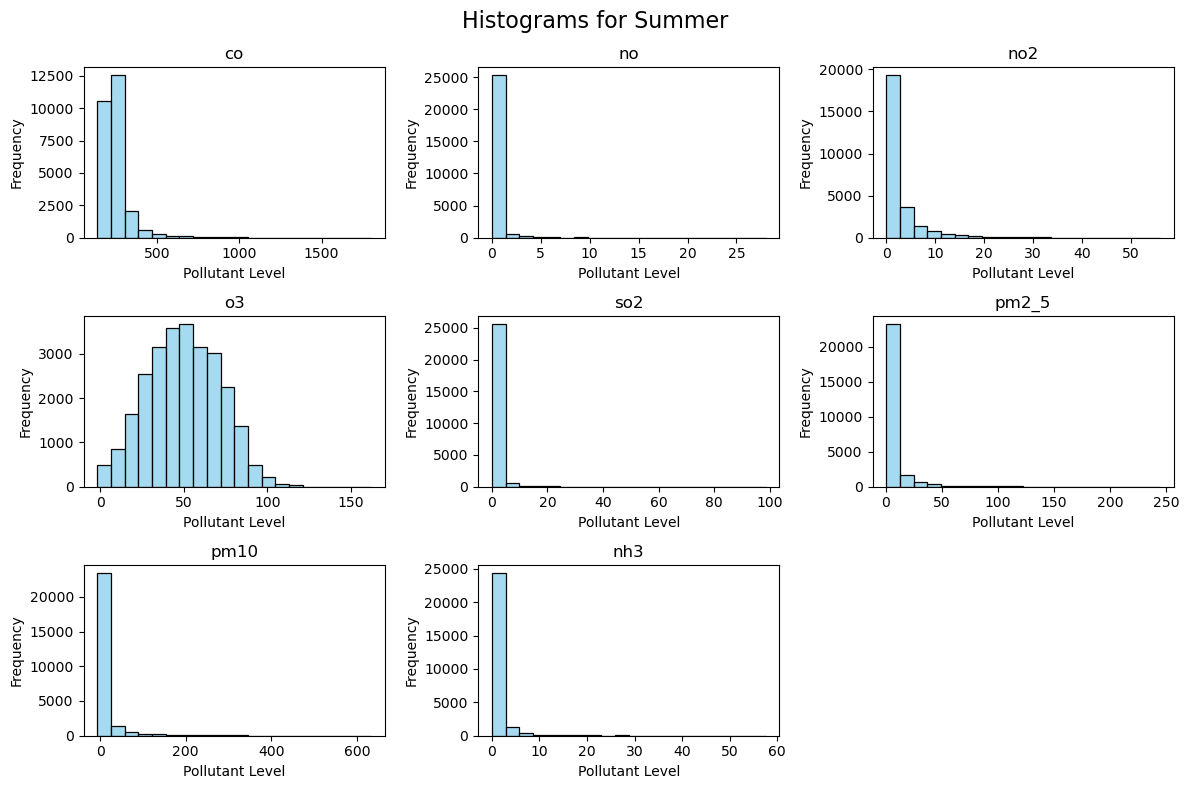

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop over each season
for season in seasons:
    # Filter data for the current season
    season_data = seasonal_cleaned_combined[seasonal_cleaned_combined['Season'] == season]

    # Create a figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        sns.histplot(seasonal_cleaned_combined[pollutant].dropna(), bins=20, color='skyblue', edgecolor='black')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Pollutant Level')  # Set x-axis label
        plt.ylabel('Frequency')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Histograms for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot


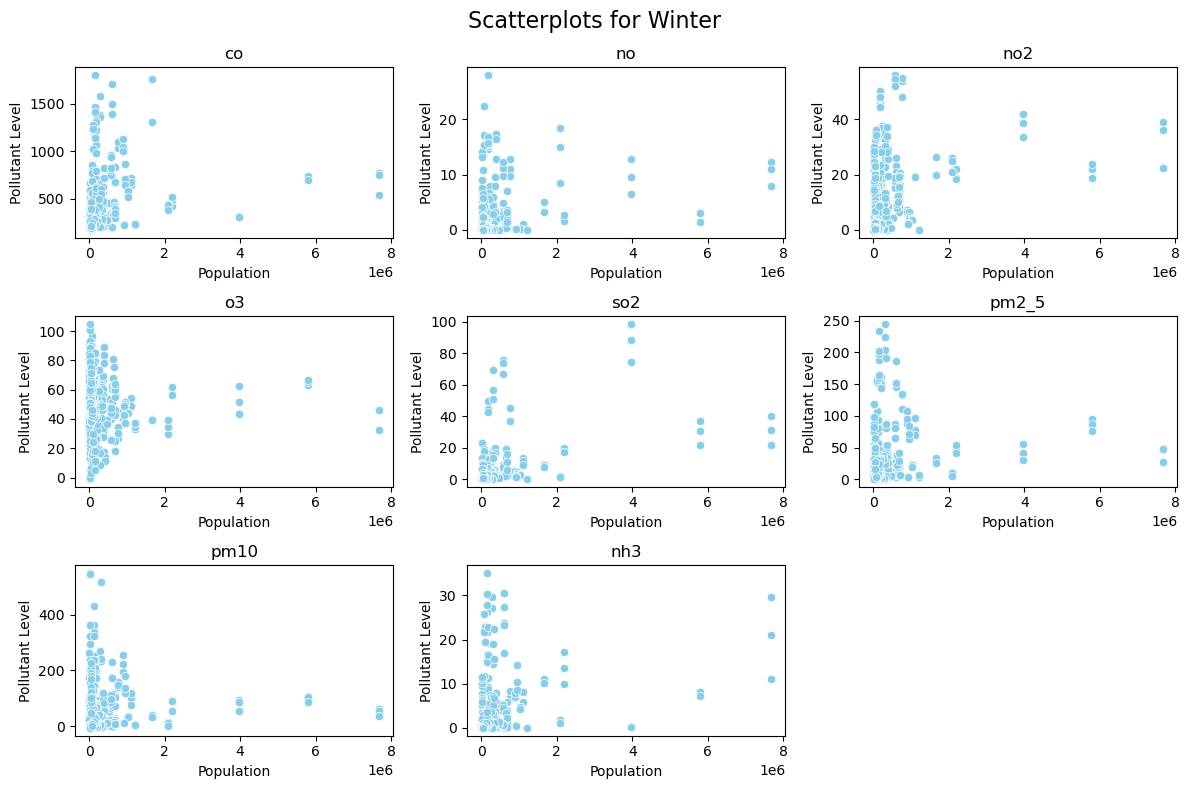

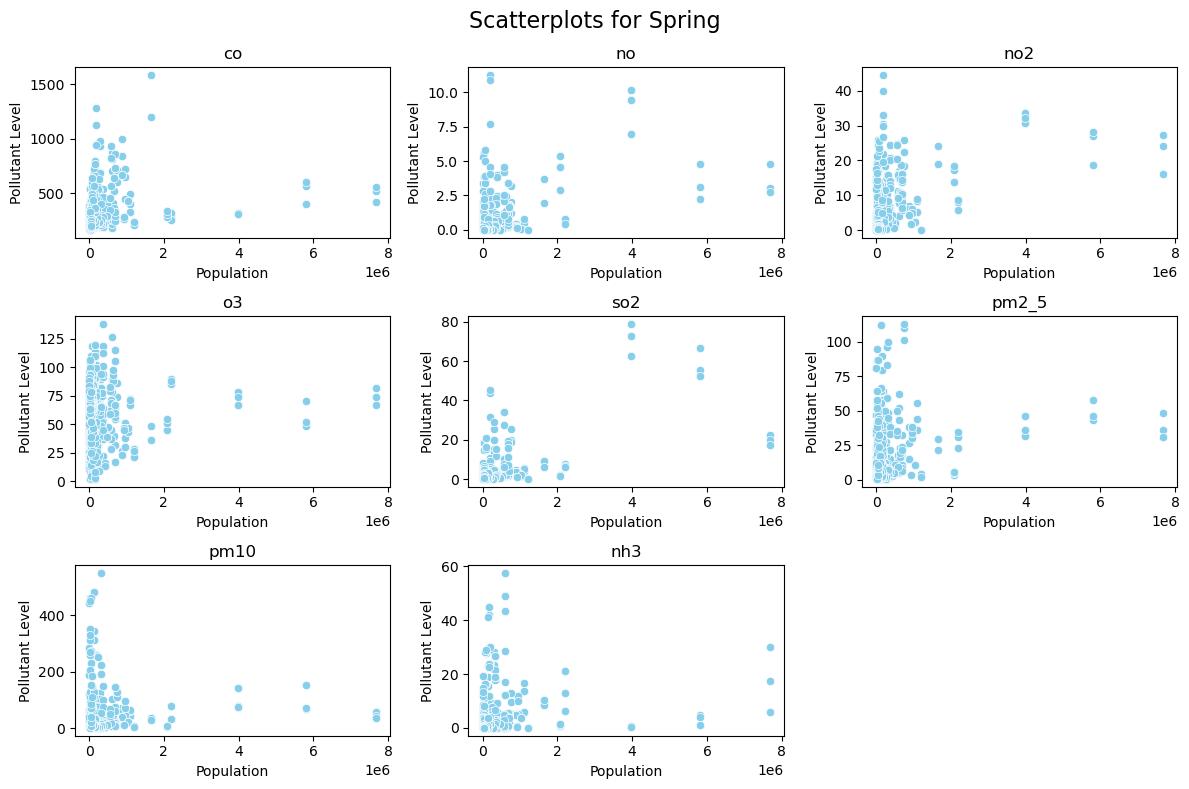

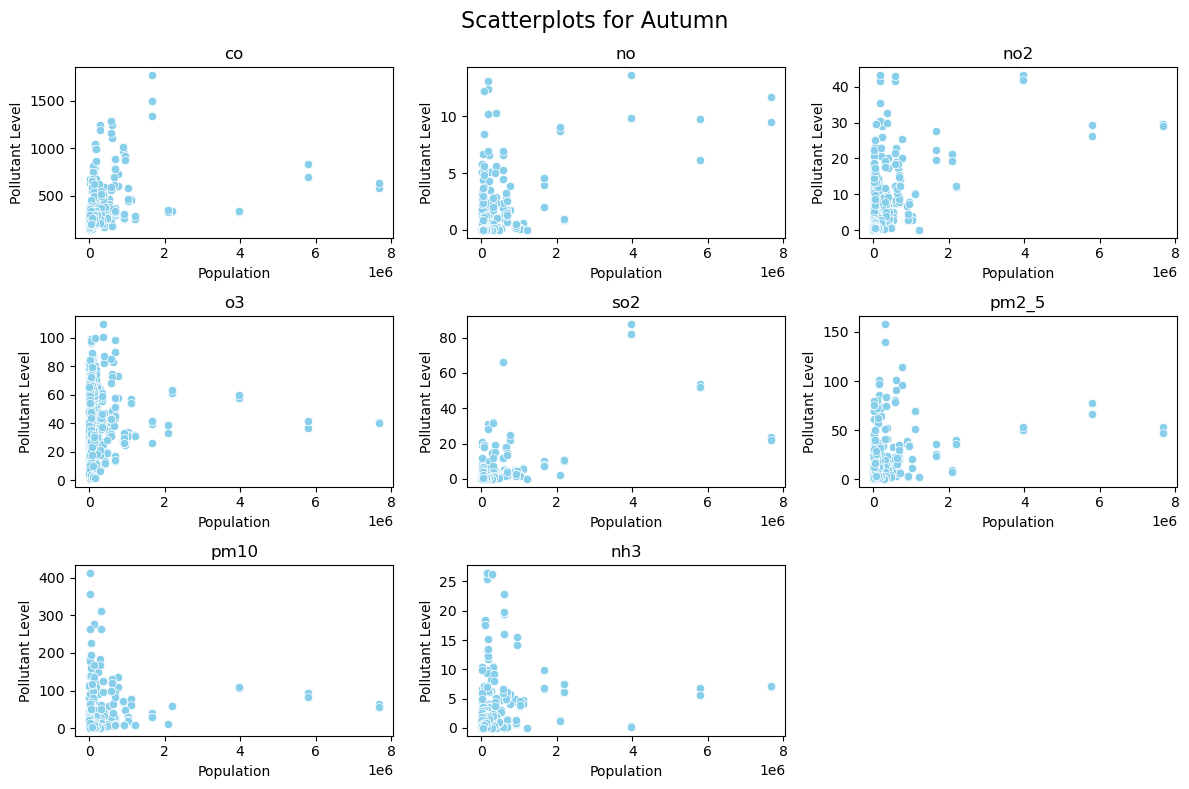

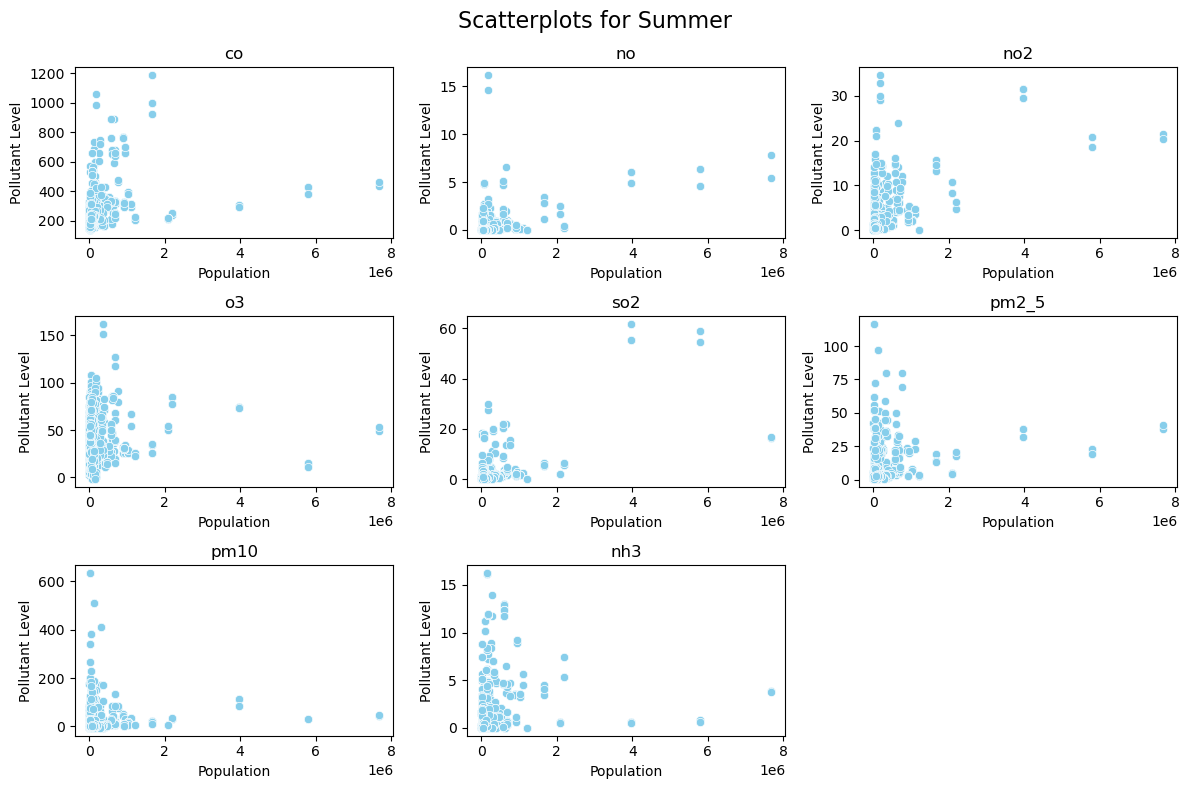

In [76]:
# Scatter plots (without outliers)

import seaborn as sns
import matplotlib.pyplot as plt

# Loop over each season
for season in seasons:
    # Filter data for the current season
    season_data = seasonal_cleaned_combined[seasonal_cleaned_combined['Season'] == season]

    # Create a figure for the current season
    plt.figure(figsize=(12, 8))
    
    # Iterate over each pollutant
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)  # Create subplots for each pollutant
        sns.scatterplot(data=season_data, x='population', y=pollutant, color='skyblue')  # Plot histogram
        plt.title(pollutant)  # Set title
        plt.xlabel('Population')  # Set x-axis label
        plt.ylabel('Pollutant Level')  # Set y-axis label
    
    # Set overall title for the season
    plt.suptitle(f'Scatterplots for {season}', fontsize=16)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show plot

In [83]:
# Check for missing values
missing_values = seasonal_cleaned_combined_no_outliers.isnull().sum()
print("Missing Values:\n", missing_values)

# Remove rows with missing values
seasonal_cleaned_combined_no_missing = seasonal_cleaned_combined_no_outliers.dropna()

# Verify that missing values are removed
print("Shape after removing missing values:", seasonal_cleaned_combined_no_missing.shape)


Missing Values:
 city               0
Hemisphere         0
Season             0
Year               0
Season_Year        0
co                 0
no                 0
no2                0
o3                 0
so2                0
pm2_5              0
pm10               0
nh3                0
name               0
latitude           0
longitude          0
country         1058
population      8377
is_capital         0
is_rural           0
country_full       0
city_season        0
dtype: int64
Shape after removing missing values: (183303, 22)


In [84]:
# Check for missing values
missing_values = seasonal_cleaned_combined_no_missing.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 city            0
Hemisphere      0
Season          0
Year            0
Season_Year     0
co              0
no              0
no2             0
o3              0
so2             0
pm2_5           0
pm10            0
nh3             0
name            0
latitude        0
longitude       0
country         0
population      0
is_capital      0
is_rural        0
country_full    0
city_season     0
dtype: int64


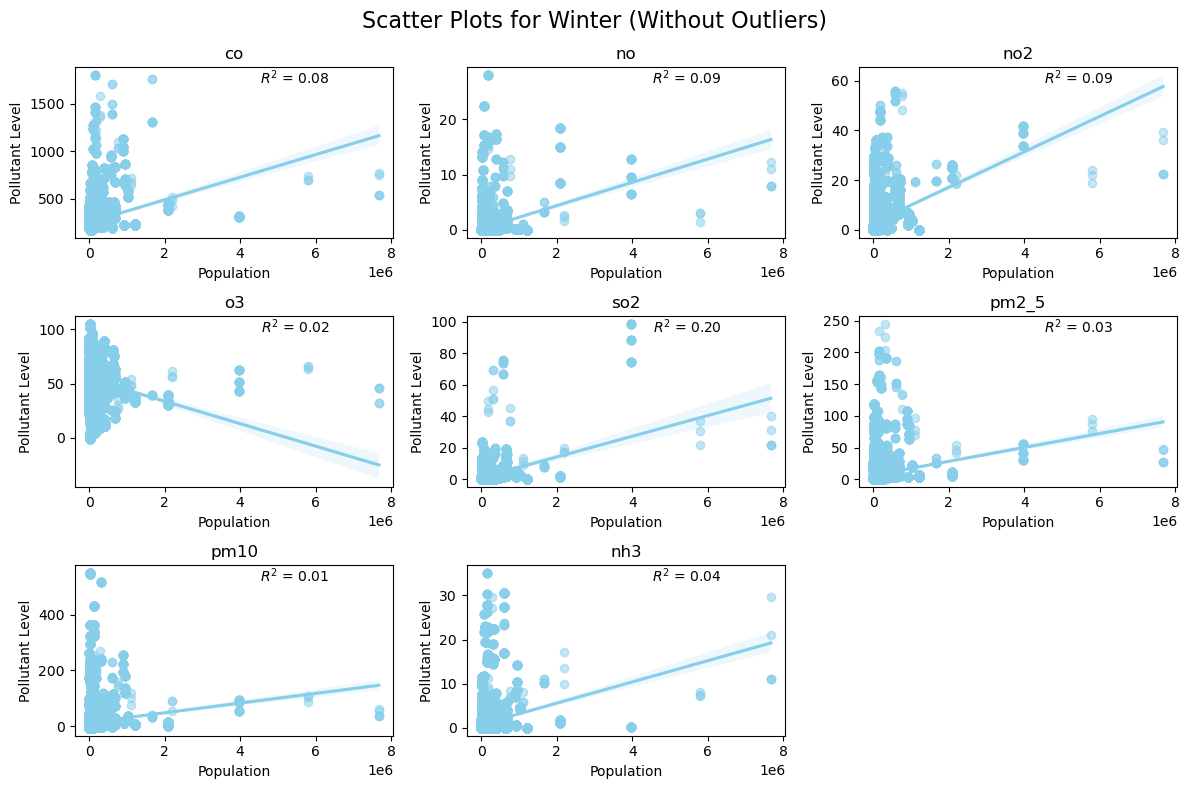

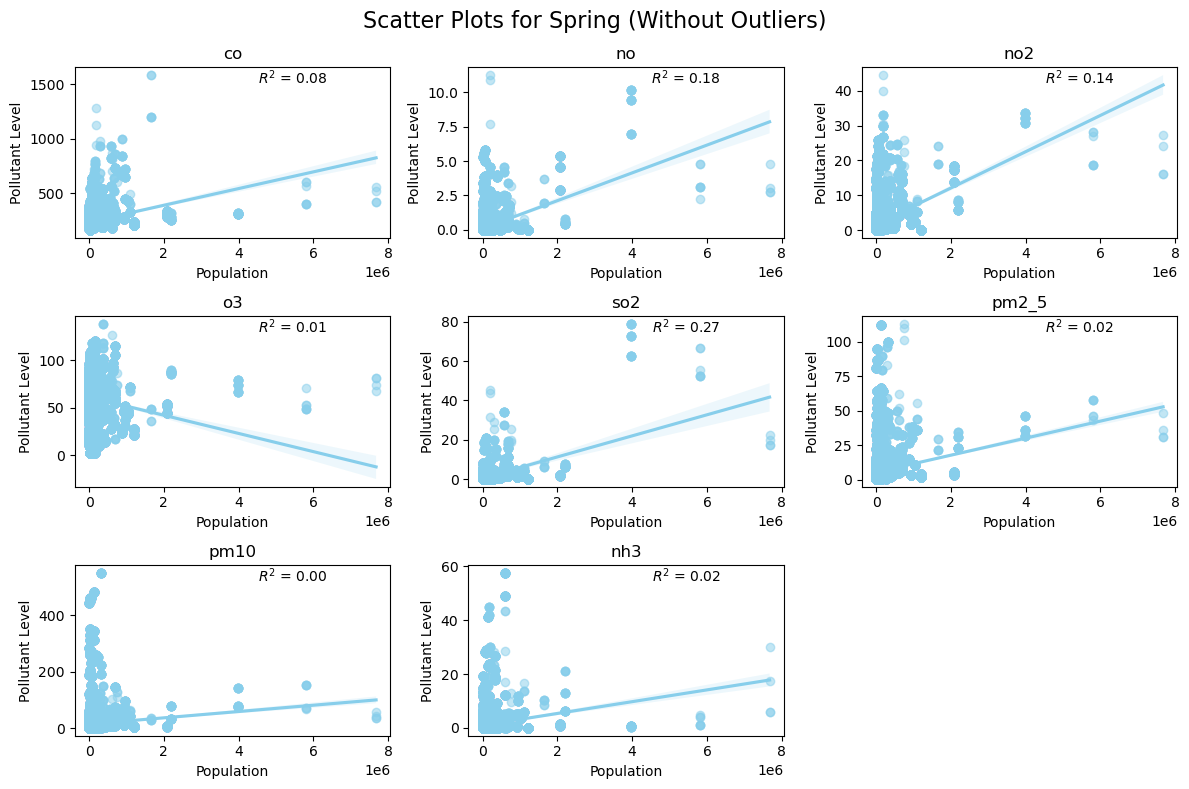

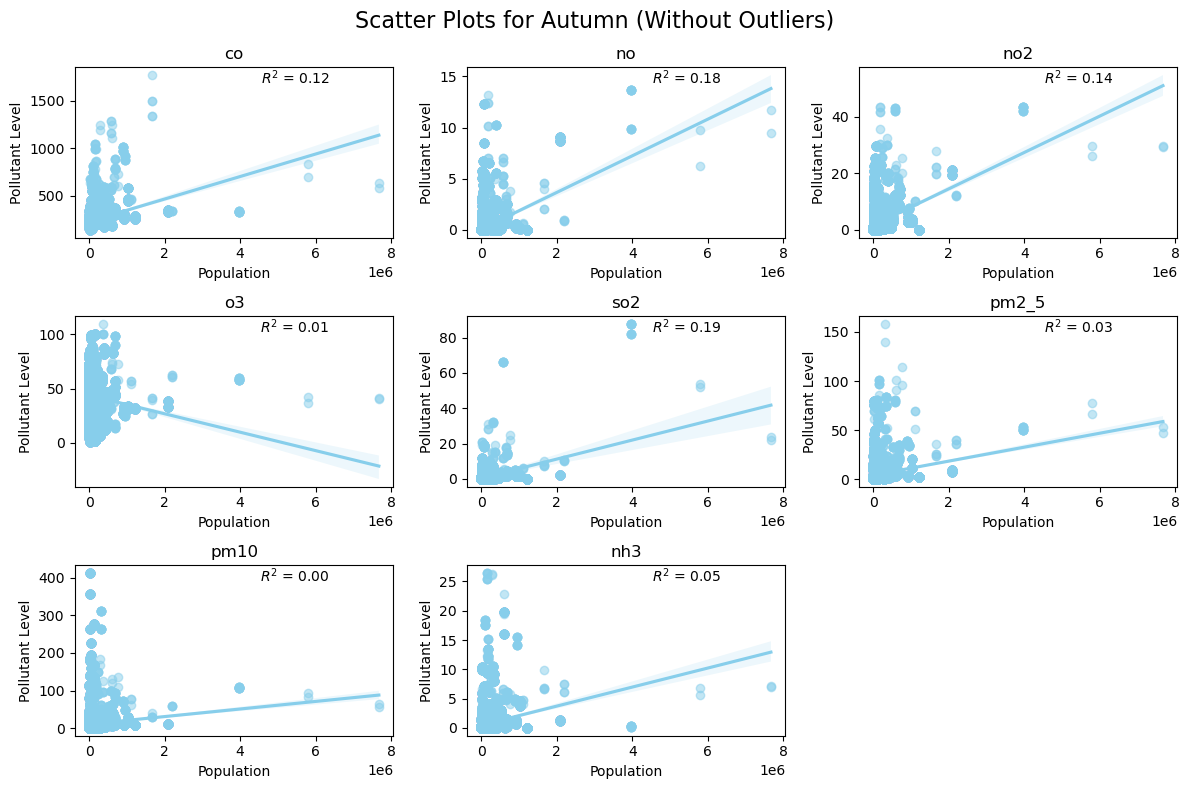

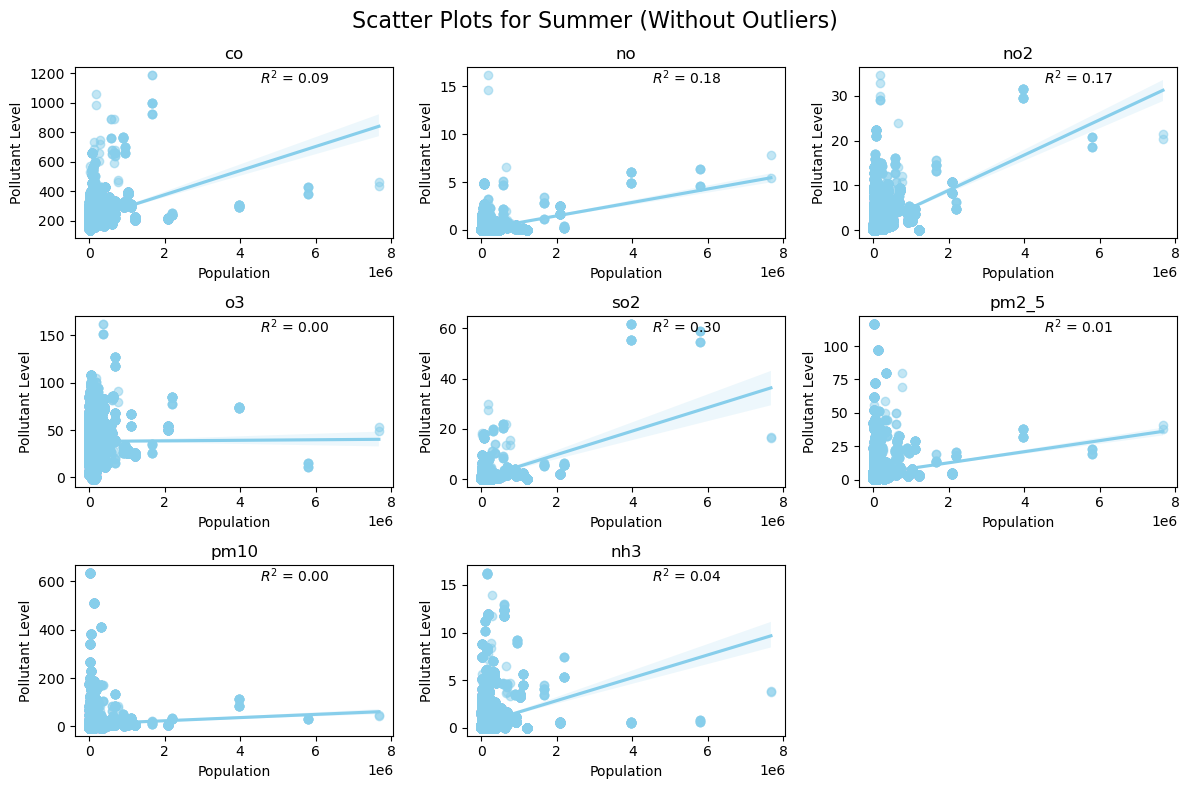

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Function to remove outliers using IQR method
def remove_outliers(df):
    df_cleaned = pd.DataFrame()
    for pollutant in pollutants:
        for season in seasons:
            # Select subset for each pollutant and season
            subset = df[(df['Season'] == season) & (df[pollutant].notnull())][pollutant]
            # Calculate IQR
            Q1 = subset.quantile(0.25)
            Q3 = subset.quantile(0.75)
            IQR = Q3 - Q1
            # Filter outliers
            subset_cleaned = df[(df['Season'] == season) & ((df[pollutant] >= (Q1 - 1.5 * IQR)) & (df[pollutant] <= (Q3 + 1.5 * IQR)))]
            # Append to cleaned DataFrame
            df_cleaned = pd.concat([df_cleaned, subset_cleaned])
    return df_cleaned

# Remove outliers from seasonal_cleaned_combined
seasonal_cleaned_combined_no_outliers = remove_outliers(seasonal_cleaned_combined)

# Plot scatter plots with trend lines and R^2 values
for season in seasons:
    season_data_no_outliers = seasonal_cleaned_combined_no_outliers[seasonal_cleaned_combined_no_outliers['Season'] == season]
    plt.figure(figsize=(12, 8))
    for idx, pollutant in enumerate(pollutants, start=1):
        plt.subplot(3, 3, idx)
        
        # Plot scatter plot with trend line and R^2 value
        sns.regplot(data=season_data_no_outliers, x='population', y=pollutant, color='skyblue', scatter_kws={'alpha':0.5})
        
        # Annotate R^2 value
        x_min, x_max = plt.xlim()
        y_min, y_max = plt.ylim()
        x_pos = x_max - 0.2 * (x_max - x_min)
        y_pos = y_max - 0.1 * (y_max - y_min)
        plt.text(x_pos, y_pos, f'$R^2$ = {np.square(season_data_no_outliers[[pollutant, "population"]].corr().iloc[0, 1]):.2f}', ha='right')
        
        plt.title(pollutant)
        plt.xlabel('Population')
        plt.ylabel('Pollutant Level')
        
    plt.suptitle(f'Scatter Plots for {season} (Without Outliers)', fontsize=16)
    plt.tight_layout()
    plt.show()



{'co': nan, 'no': nan, 'no2': nan, 'o3': nan, 'so2': nan, 'pm2_5': nan, 'pm10': nan, 'nh3': nan}


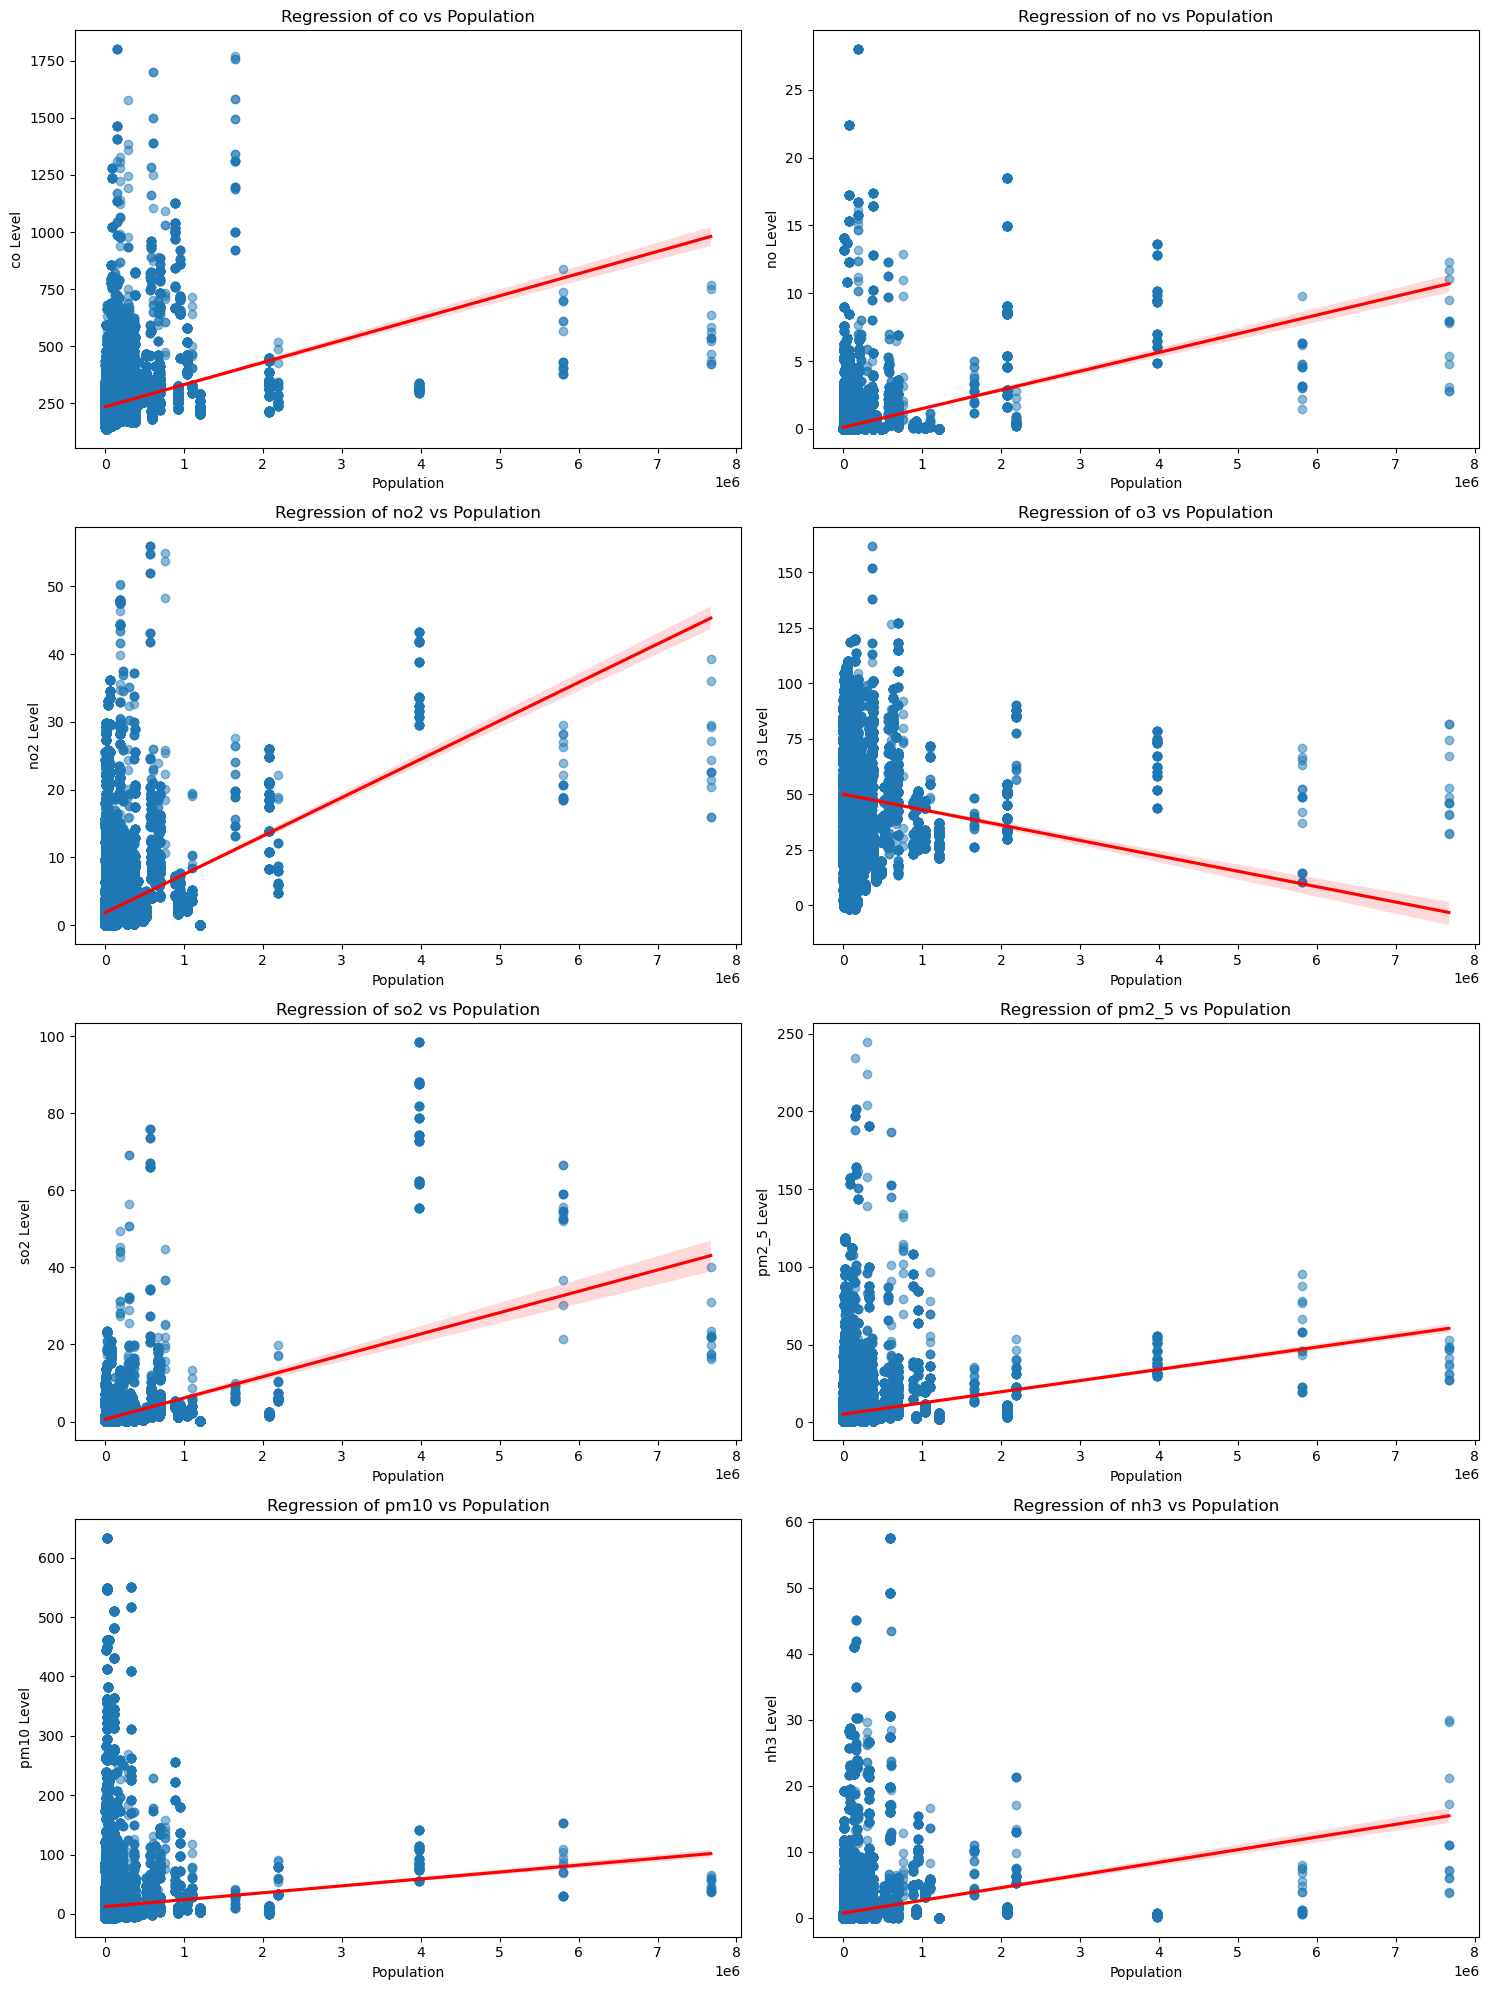

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np


# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(seasonal_cleaned_combined_no_outliers['population'], seasonal_cleaned_combined_no_outliers[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}
print(correlations)

# Plotting and fitting linear regression for each pollutant
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants):
    sns.regplot(x='population', y=pollutant, data=seasonal_cleaned_combined_no_outliers, ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'Regression of {pollutant} vs Population')
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()


{'co': 0.27673075258734203, 'no': 0.3568303584742834, 'no2': 0.3289205808323152, 'o3': -0.11989795361117453, 'so2': 0.3144609011079909, 'pm2_5': 0.2634671307498391, 'pm10': 0.18633478787057384, 'nh3': 0.3394210251553876}


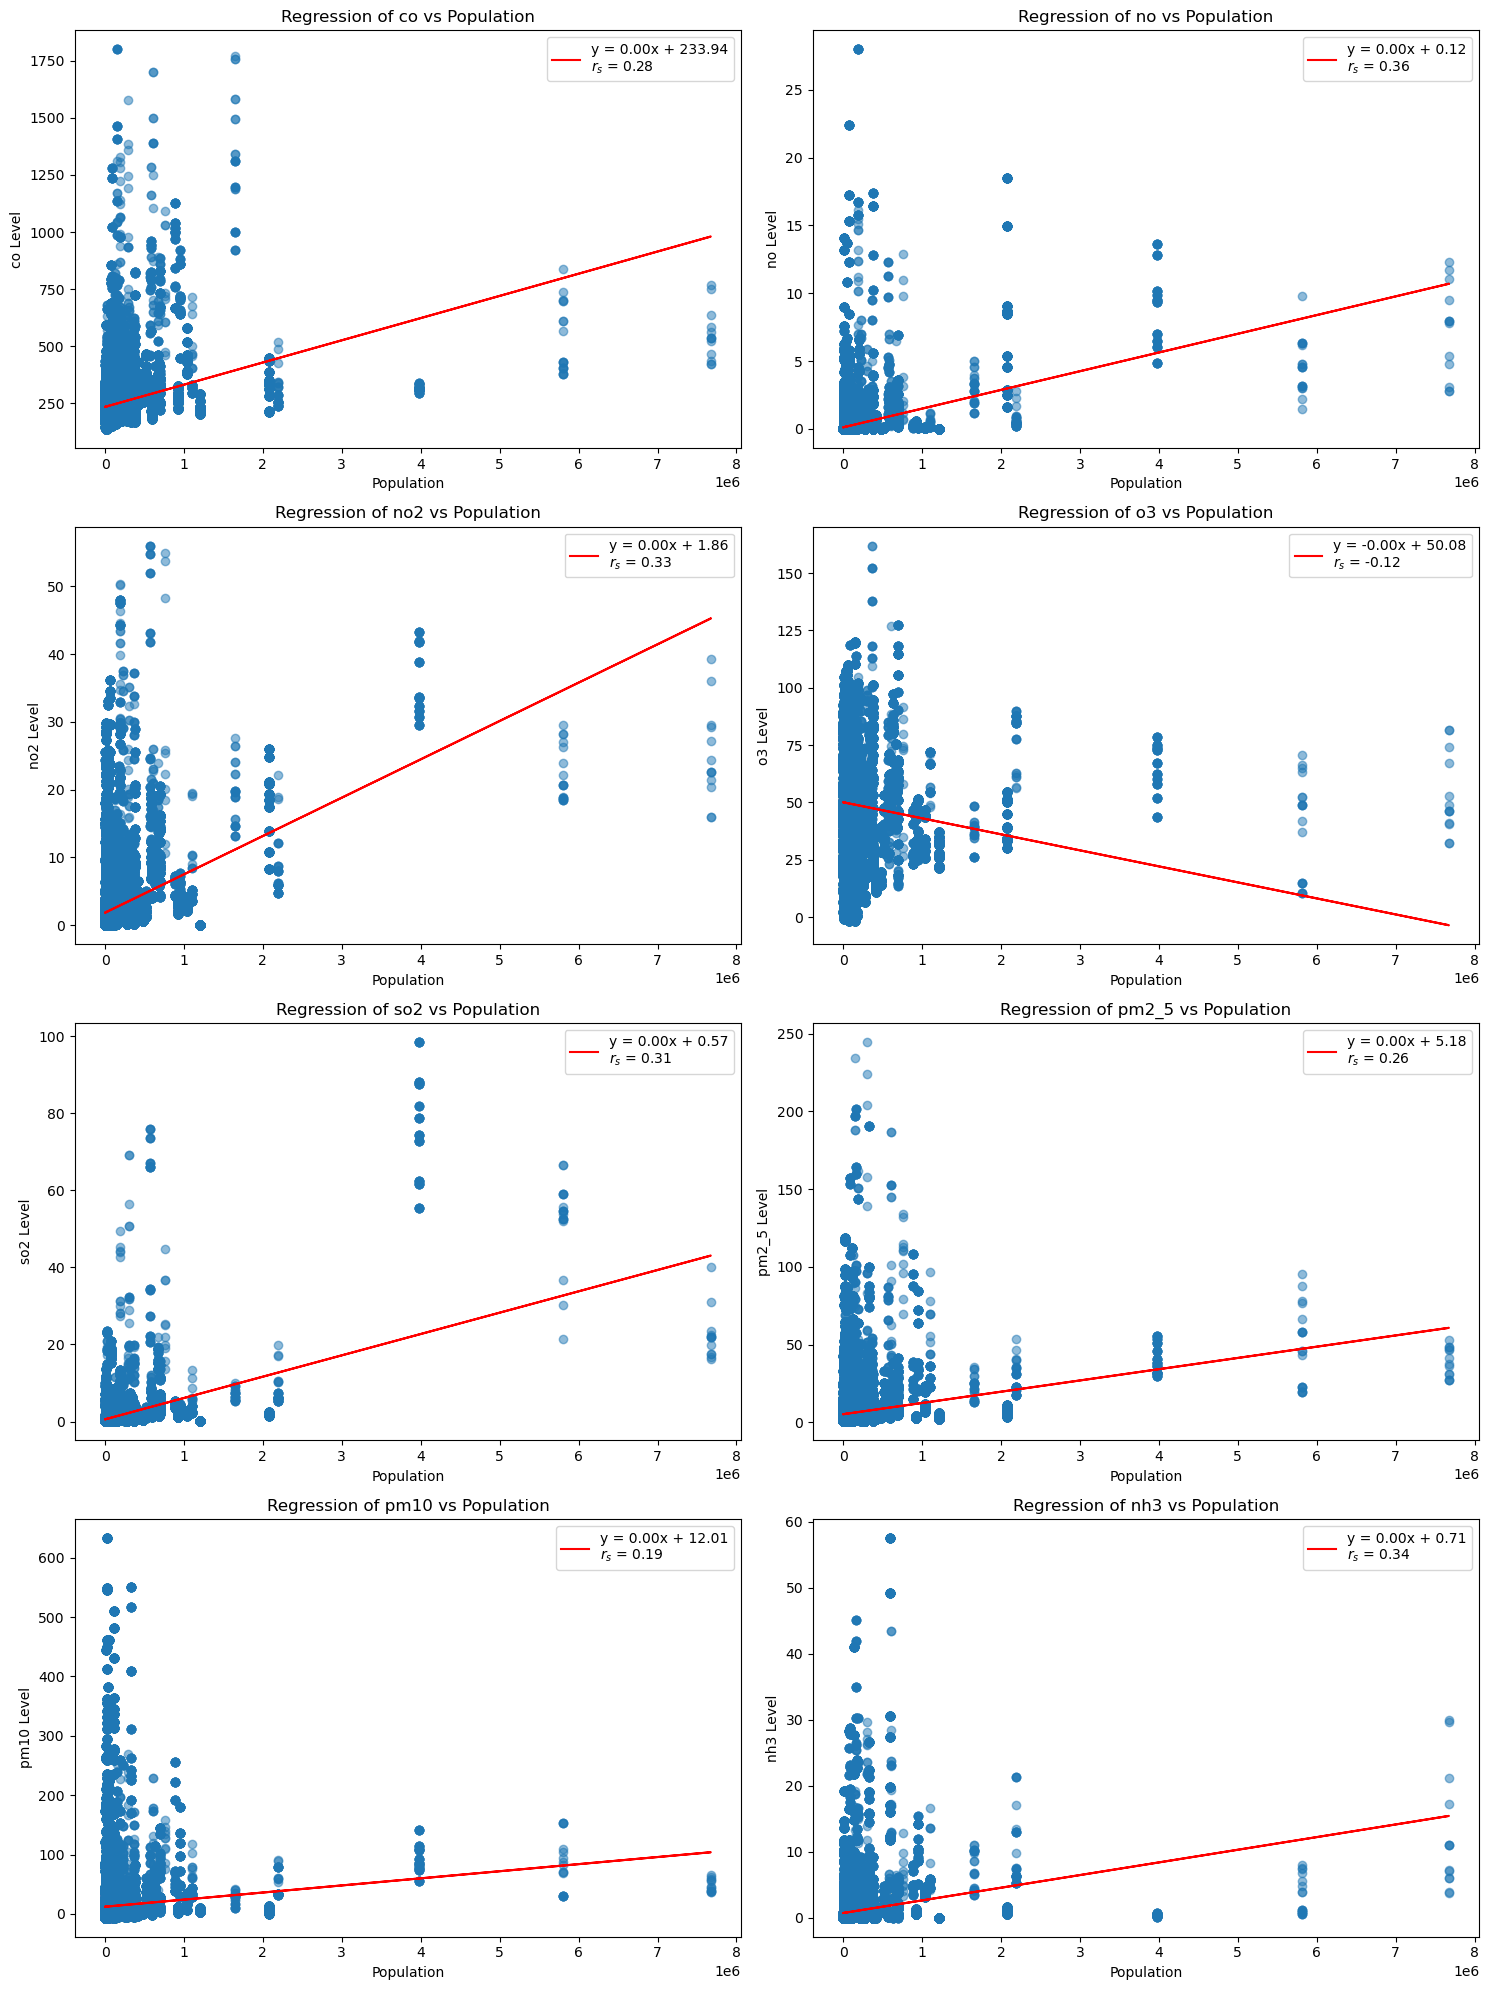

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import numpy as np

# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(seasonal_cleaned_combined_no_missing['population'], seasonal_cleaned_combined_no_missing[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}
print(correlations)

# Plotting and fitting linear regression for each pollutant
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for i, pollutant in enumerate(pollutants):
    # Extract the data
    x = seasonal_cleaned_combined_no_missing['population'].values.reshape(-1,1)
    y = seasonal_cleaned_combined_no_missing[pollutant].values

    # Fit the linear regression model
    model = LinearRegression()
    model.fit(x, y)

    # Calculate the trend line
    trendline = model.predict(x)

    # Plot scatter and trend line
    axes[i].scatter(x, y, alpha=0.5)
    axes[i].plot(x, trendline, color='red', label=f'y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}\n$r_s$ = {correlations[pollutant]:.2f}')

    # Set titles and labels with coefficients
    axes[i].set_title(f'Regression of {pollutant} vs Population')
    axes[i].set_xlabel('Population')
    axes[i].set_ylabel(f'{pollutant} Level')
    axes[i].legend()

plt.tight_layout()
plt.show()


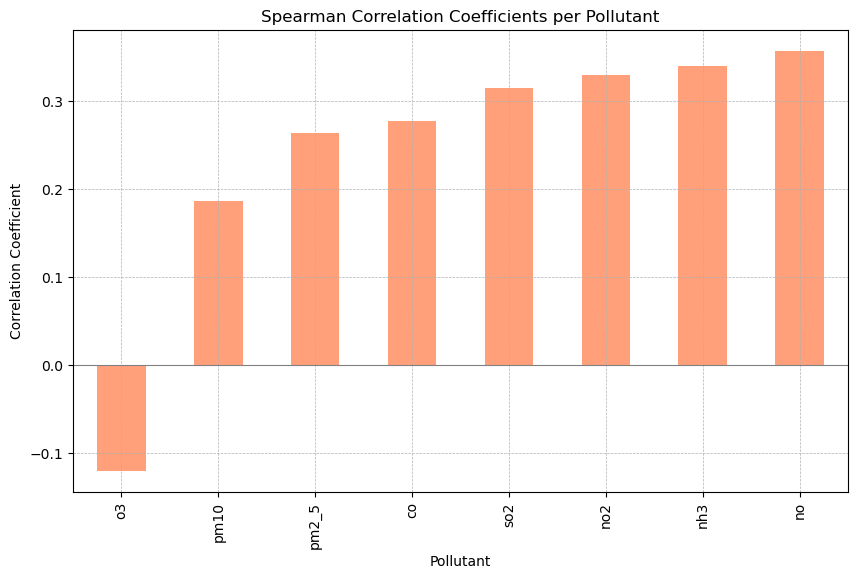

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

# Assuming 'seasonal_cleaned_combined_no_outliers' is your DataFrame
# Calculate Spearman correlation coefficients
correlations = {pollutant: spearmanr(seasonal_cleaned_combined_no_missing['population'], seasonal_cleaned_combined_no_missing[pollutant])[0] for pollutant in ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']}

# Converting the dictionary to a pandas Series for easy plotting
correlation_series = pd.Series(correlations)

# Plotting the correlation coefficients
plt.figure(figsize=(10, 6))
correlation_series.sort_values().plot(kind='bar', color='lightsalmon')
plt.title('Spearman Correlation Coefficients per Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('Correlation Coefficient')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='gray', linewidth=0.8)  # Adds a horizontal line at zero for reference
plt.show()


In [98]:
# Check for NaN values in the dataset
print(seasonal_cleaned_combined_no_missing.isnull().sum())


city            0
Hemisphere      0
Season          0
Year            0
Season_Year     0
co              0
no              0
no2             0
o3              0
so2             0
pm2_5           0
pm10            0
nh3             0
name            0
latitude        0
longitude       0
country         0
population      0
is_capital      0
is_rural        0
country_full    0
city_season     0
dtype: int64


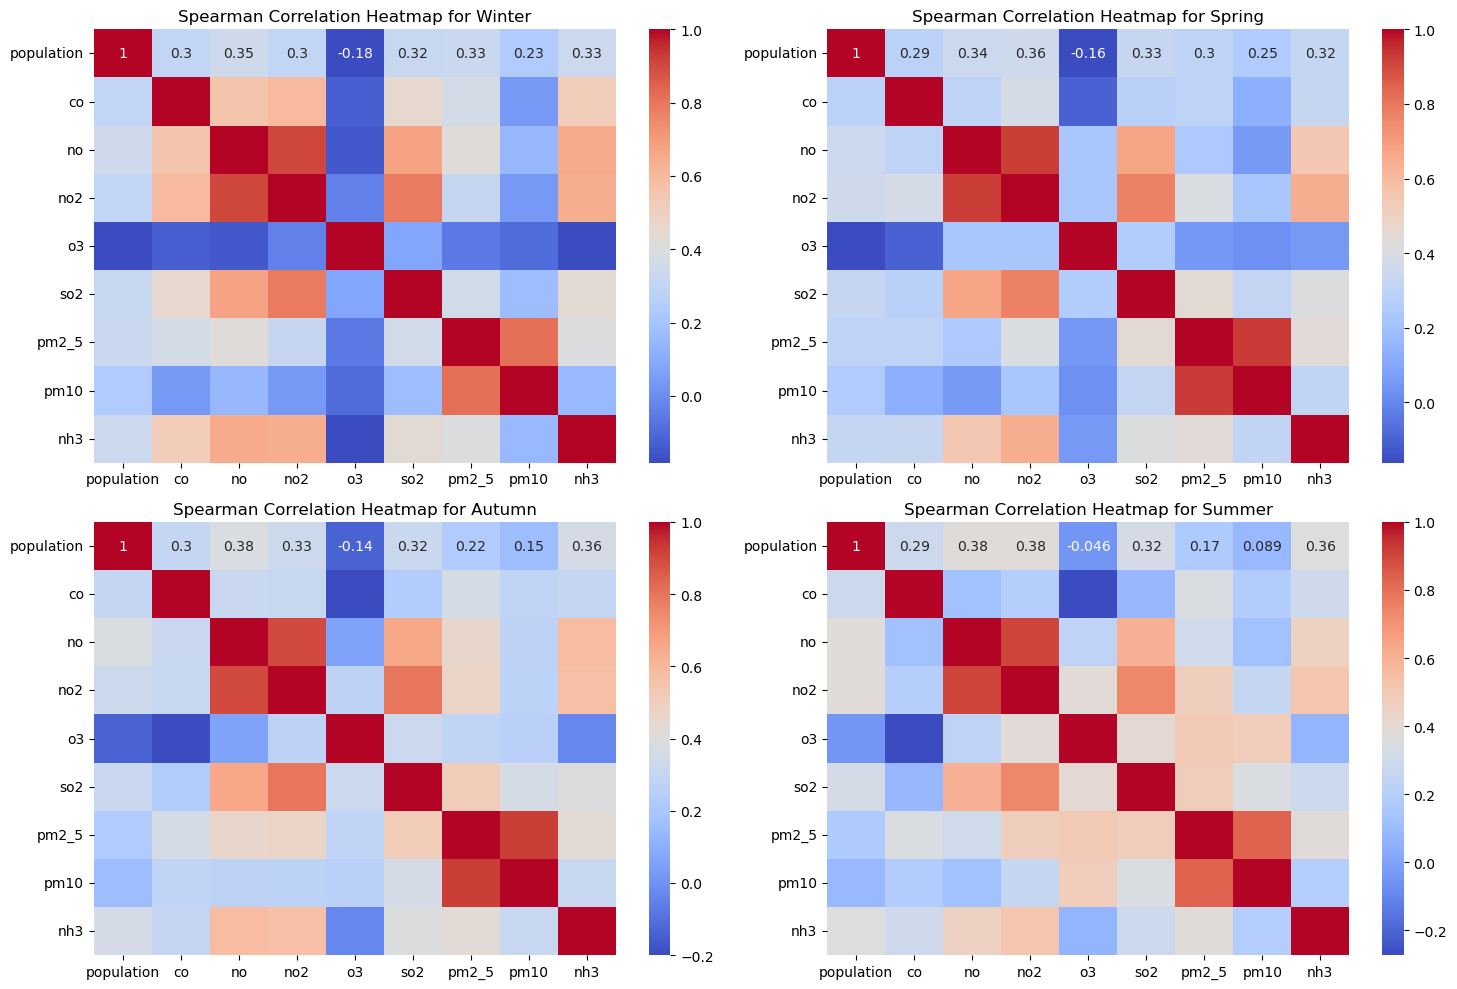

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of seasons, ensuring we only plot four
seasons = seasonal_cleaned_combined_no_missing['Season'].unique()

# Creating a subplot structure in a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each season and corresponding subplot axis
for ax, season in zip(axes, seasons):
    # Filter data for the current season
    season_data = seasonal_cleaned_combined_no_missing[seasonal_cleaned_combined_no_missing['Season'] == season]
    
    # Calculate the Spearman correlation matrix for the current season
    correlation_matrix = season_data[['population', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].corr(method='spearman')
    
    # Plot heatmap on the corresponding axis
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
    ax.set_title(f'Spearman Correlation Heatmap for {season}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# ANOVA - nh3

group0 = seasonal_pollution_clean_df[seasonal_pollution_clean_df["Season"] == 'Summer']["nh3"]
group1 = seasonal_pollution_clean_df[seasonal_pollution_clean_df["Season"] == 'Autumn']["nh3"]
group2 = seasonal_pollution_clean_df[seasonal_pollution_clean_df["Season"] == 'Winter']["nh3"]
group3 = seasonal_pollution_clean_df[seasonal_pollution_clean_df["Season"] == 'Spring']["nh3"]

In [ ]:
# Perform the ANOVA - nh3
stats.f_oneway(group0, group1, group2, group3)

In [ ]:
# Make sure the output directory exists
os.makedirs(stats_output_dir_season, exist_ok=True)

# Prepare data for ANOVA and plotting
pollutant_data_by_season = {
    pollutant: [
        seasonal_pollution_df[
            (seasonal_pollution_df['Season'] == season) & 
            (seasonal_pollution_df[pollutant].notna())
        ][pollutant].values for season in seasons
    ] for pollutant in pollutants
}

# Prepare a file to log ANOVA results
anova_results_path = os.path.join(stats_output_dir_season, 'ANOVA_results.txt')
with open(anova_results_path, 'w') as results_file:
    results_file.write("ANOVA Results for Pollutants Across Seasons\n")
    results_file.write("-------------------------------------------------\n")

    # Conduct ANOVA for each pollutant and create box plots
    for pollutant, data in pollutant_data_by_season.items():
        # Ensure there's enough data for ANOVA (i.e., at least one season with data)
        if all(len(d) > 1 for d in data):  # Checking that each season has more than one data point
            # Perform ANOVA
            f_stat, p_value = stats.f_oneway(*data)
            results_file.write(f"{pollutant.capitalize()}:\n")
            results_file.write(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4e}\n")
            results_file.write("\n")

            # Create and save box plot
            fig, ax = plt.subplots()
            ax.boxplot(data, labels=seasons, showfliers=False)
            ax.set_title(f'{pollutant.capitalize()} Levels Across Seasons')
            ax.set_ylabel('Concentration')
            ax.set_xlabel('Season')
            plt.xticks(rotation=45)
            plt.tight_layout()
            png_file_name = f'{pollutant}_box_plots.png'
            png_file_path = os.path.join(stats_output_dir_season, png_file_name)
            fig.savefig(png_file_path)
            plt.close(fig)  # Close the figure to free up memory

        else:
            results_file.write(f"Not enough data for ANOVA on {pollutant}.\n\n")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your ANOVA results
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3']
f_statistics = [30.5779, 21.9336, 44.9542, 198.0145, 7.5631, 25.4162, 7.9426, 17.9767]
p_values = [1.5974e-19, 4.4627e-14, 1.5603e-28, 3.4625e-119, 4.8375e-05, 2.8428e-16, 2.8098e-05, 1.3981e-11]

# Convert P-values to a negative log scale to make them more readable on the graph
neg_log_p_values = -np.log10(p_values)


In [ ]:
fig, ax = plt.subplots()

# Create a bar chart for the F-statistics
bars = ax.bar(pollutants, f_statistics, color='skyblue')

# Label the chart and axes
ax.set_xlabel('Pollutant')
ax.set_ylabel('F-Statistic')
ax.set_title('ANOVA F-Statistics for Pollutants Across Seasons')
ax.set_yscale('log')  # Use a log scale for better visibility if values vary widely

# Annotate bars with P-values
for bar, p_value in zip(bars, neg_log_p_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{p_value:.2f}', va='bottom', ha='center')  # Adjust formatting as needed

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()


In [ ]:
# Data from your ANOVA results (reusing some of the example data)
pollutants = ['CO', 'NO', 'NO2', 'O3', 'SO2', 'PM2_5', 'PM10', 'NH3']
p_values = [1.5974e-19, 4.4627e-14, 1.5603e-28, 3.4625e-119, 4.8375e-05, 2.8428e-16, 2.8098e-05, 1.3981e-11]

# Convert P-values to a negative log scale to make them more readable on the graph
neg_log_p_values = -np.log10(p_values)

# Create the plot
fig, ax = plt.subplots()

# Create a bar chart for the negative log of P-values
bars = ax.bar(pollutants, neg_log_p_values, color='skyblue')

# Label the chart and axes
ax.set_xlabel('Pollutant')
ax.set_ylabel('-log10(P-Value)')
ax.set_title('Negative Log of P-Values for ANOVA Tests Across Seasons')

# Setting y-axis with a log scale may not be necessary here because values are already transformed
# ax.set_yscale('log')

# Annotate bars with original P-values
for bar, p_value in zip(bars, p_values):
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{p_value:.2e}', va='bottom', ha='center')  # Adjust formatting as needed

plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

Analysis Summary:

1. Carbon Monoxide (CO):
- F-Statistic: 30.5779
- P-Value: 1.5974e-19
- Interpretation: The extremely small P-value suggests there is a highly significant difference in the mean levels of CO across seasons.

2. Nitric Oxide (NO):
- F-Statistic: 21.9336
- P-Value: 4.4627e-14
- Interpretation: There is a significant difference in NO concentrations across seasons, indicated by a very small P-value.

3. Nitrogen Dioxide (NO2):
- F-Statistic: 44.9542
- P-Value: 1.5603e-28
- Interpretation: The results show a highly significant seasonal variation in NO2 levels.

4. Ozone (O3):
- F-Statistic: 198.0145
- P-Value: 3.4625e-119
- Interpretation: Ozone shows the strongest seasonal variation among all pollutants tested, with a strikingly significant difference in means.

5. Sulfur Dioxide (SO2):
- F-Statistic: 7.5631
- P-Value: 4.8375e-05
- Interpretation: There is a significant difference in SO2 concentrations across different seasons, although the effect size (as suggested by the F-statistic) is smaller compared to others like O3 or NO2.

6. Particulate Matter 2.5 (PM2.5):
- F-Statistic: 25.4162
- P-Value: 2.8428e-16
- Interpretation: PM2.5 levels vary significantly across seasons, with a very low P-value indicating strong statistical significance.

7. Particulate Matter 10 (PM10):
- F-Statistic: 7.9426
- P-Value: 2.8098e-05
- Interpretation: There's a significant seasonal variation in PM10 levels, similar to SO2 in terms of statistical weight.

8. Ammonia (NH3):
- F-Statistic: 17.9767
- P-Value: 1.3981e-11
- Interpretation: NH3 concentrations significantly differ across seasons, showing substantial variation.

```Conclusion:```
The ANOVA tests reveal significant differences in the seasonal concentrations of all tested pollutants. The results suggest that factors influencing these pollutants vary across different times of the year, which could be due to changes in weather, heating practices, traffic patterns, or other seasonal activities affecting pollutant levels.

# Spatial Plotting

In [ ]:
# Import the required libraries
import hvplot.pandas
import pandas as pd

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [ ]:
coordinates_df = seasonal_pollution_clean_df.copy()

# Columns of interest for spatial plotting
coordinates_df = coordinates_df[['city', 'country_full', 'latitude', 'longitude', 'Season', 'population', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]

coordinates_df.head(3)

In [ ]:
# Select only numeric columns for aggregation
numeric_cols = coordinates_df.select_dtypes(include=[np.number]).columns.tolist()

# Specify the columns to group by
grouping_cols = ['city', 'Season']

# Group by 'city' and 'Season', and calculate the mean for numeric columns
city_season_aggregates = coordinates_df.groupby(grouping_cols)[numeric_cols].mean()

# Reset the index if you want 'city' and 'Season' as columns and not as an index
city_season_aggregates = city_season_aggregates.reset_index()

city_season_aggregates.head()  # Shows the first few rows of the aggregated data

In [ ]:
import geoviews as gv
import geoviews.tile_sources as gts
import hvplot.pandas  # Provides an extension to convert Pandas DataFrame into a Holoviews object
import pandas as pd
import holoviews as hv




In [ ]:
# # Enable Holoviews extension for Jupyter
# hv.extension('bokeh')

# # Select a tile source
# tiles = gv.tile_sources.OSM

# from selenium import webdriver

In [ ]:
# Define the list of pollutants and seasons
# pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
# seasons = ['Winter', 'Spring', 'Autumn', 'Summer']

# # Iterate over pollutants and seasons
# for pollutant in pollutants:
#     for season in seasons:
#         # Filter the DataFrame for the current season and pollutant
#         data = coordinates_df[(coordinates_df['Season'] == season) & (coordinates_df['latitude'] >= -60) & (coordinates_df['latitude'] <=80)]
        
#         # Plotting code with population as bubble size and current pollutant
#         points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', size=(data['population'] * 0.0001), hover_cols=['city', 'Season', pollutant])
        
#         # Set latitude range on the points element
#         points.opts(apply_ranges=True, ylim=(-60, 80))
        
#         plot = tiles * points

#         # Calculate aspect ratio dynamically based on the range of longitude and latitude values
#         lon_range = data['longitude'].max() - data['longitude'].min()
#         lat_range = data['latitude'].max() - data['latitude'].min()
#         aspect_ratio = lat_range / lon_range
        
#         plot.opts(width=2000, height=int(800*aspect_ratio), toolbar='above', title=f"{season} {pollutant} Pollution Levels by City", align='center', margin=(0, 0, 0, 0))
        
#         # Save the plot as a PNG file in the outputs directory
#         output_filename = os.path.join(stats_output_dir_season, f"{pollutant}_{season}.png")
#         hv.save(plot, output_filename, backend='matplotlib')

#         print(f"Plot saved for {pollutant} in {season} season.")

In [ ]:
import geoviews as gv
import geoviews.tile_sources as gts
import hvplot.pandas
import pandas as pd
import holoviews as hv
import os

# Enable Holoviews extension for Jupyter
hv.extension('bokeh')

# Select a tile source
tiles = gv.tile_sources.OSM

# Plot the tiles
tiles.opts(width=600, height=400, bgcolor='white')




In [ ]:
# Define the list of pollutants and seasons
pollutants = ['co']
seasons = ['Winter']

# Iterate over pollutants and seasons
for pollutant in pollutants:
    for season in seasons:
        # Filter the DataFrame for the current season and pollutant
        data = coordinates_df[(coordinates_df['Season'] == season) & 
                              (coordinates_df['latitude'] >= -60) & 
                              (coordinates_df['latitude'] <= 80)]
        
        # Plotting code with population as bubble size and current pollutant
        co_points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', 
                                       size=(data['population'] * 0.0001), alpha=0.6, legend=True, 
                                       hover_cols=['city', 'Season', pollutant])
        
        # Set latitude range on the points element
        co_points.opts(apply_ranges=True, ylim=(-60, 80))
        
        # Display the plot
        display(co_points)



In [ ]:
import geoviews as gv
import geoviews.tile_sources as gts
import hvplot.pandas
import pandas as pd
import holoviews as hv
from IPython.display import display

# Enable Holoviews extension for Jupyter
hv.extension('bokeh')

# Select a tile source
tiles = gv.tile_sources.OSM

# Define the list of pollutants and seasons
pollutants = ['co']
seasons = ['Winter']

# Iterate over pollutants and seasons
for pollutant in pollutants:
    for season in seasons:
        # Filter the DataFrame for the current season and pollutant
        data = coordinates_df[(coordinates_df['Season'] == season) & 
                              (coordinates_df['latitude'] >= -60) & 
                              (coordinates_df['latitude'] <= 80)]
        
        # Plotting code with population as bubble size and current pollutant
        co_points = data.hvplot.points('longitude', 'latitude', geo=True, color=pollutant, cmap='rainbow', 
                                       size=(data['population'] * 0.0001), alpha=0.6, legend=True, 
                                       hover_cols=['city', 'Season', pollutant])
        
        # Set latitude range on the points element
        co_points.opts(apply_ranges=True, ylim=(-60, 80))
        
        # Combine tiles and points
        plot = tiles * co_points
        
        # Display the plot
        display(plot)


# Additional Analysis

In [ ]:
import plotly.express as px

colour=['orange', 'green', 'yellow', 'blue']

# Assuming 'mean_pollution' is already computed and properly structured
fig = px.bar(mean_pollution.reset_index(), x='Season', y='co', color='Season', barmode='group', color_discrete_sequence=colour,
             title="Average CO Levels by Season and City")
fig.show()

In [ ]:
print(mean_pollution.head())
print(mean_pollution.dtypes)

In [ ]:
# Select the top 10 cities based on CO levels, replace 'co' with the correct column name if different
top_cities = mean_pollution.nlargest(10, 'co').index

# Print the top cities to verify
print("Top cities based on CO levels:", top_cities)

In [ ]:
# Filter your main DataFrame to include only the top cities
filtered_data = seasonal_pollution_df[season['city'].isin(top_cities)]

# Assuming your DataFrame has a 'Season' column, and you want to visualize CO levels
import matplotlib.pyplot as plt

# Calculate seasonal means for the filtered top cities
seasonal_means = filtered_data.groupby(['Season', 'city'])['co'].mean().unstack()

# Plotting
seasonal_means.plot(kind='bar', figsize=(14, 7))
plt.title('Average CO Levels by Season for Top 10 Cities')
plt.xlabel('Season')
plt.ylabel('Average CO Level')
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

